In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train0 = pd.read_csv('./Data/train.csv') 

In [4]:
train0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('The number of features: ', train0.shape[1])

The number of features:  81


In [6]:
print('The number of rows: ', train0.shape[0])

The number of rows:  1460


In [7]:
print('The datatypes in the dataframe:')
train0.dtypes.unique()

The datatypes in the dataframe:


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
#list(train0)

## Create some new variables

In [9]:
# Create New Numerical Variables
train0['AgeHome'] = train0['YrSold'] - train0['YearBuilt']
train0['YrsSinceRemodel'] = train0['YrSold'] - train0['YearRemodAdd']
train0['Num_Bathrms_AbvGrd'] = train0['FullBath'] + (train0['HalfBath']*0.5)
train0['Num_Bathrms_Bsmt'] = train0['BsmtFullBath'] + train0['BsmtHalfBath'] 

In [10]:
# Ensure these variabes are categorical
train0['MSSubClass'] = train0['MSSubClass'].astype(str)
train0['MoSold'] = train0['MoSold'].astype(str)
train0['YrSold'] = train0['YrSold'].astype(str)
train0['YearBuilt'] = train0['YearBuilt'].astype(str)

# II. EXPLORATORY DATA ANALYSIS & VISUALIZATIONS

### Look at the Output/Dependent Variable (Y) - SalePrice 🎯

In [11]:
zthres = 4
# Which indices have z-scores >  zthres
zvals = stats.zscore(train0['SalePrice'])
indx = np.where(abs(zvals) > 4.0)

print('The indices with z-scores > ', zthres,':')
print(indx)
print('\nThose z-scores: ')
print(zvals[indx])
print('\nNumber of indices:',len(indx[0]))

The indices with z-scores >  4 :
(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182]),)

Those z-scores: 
[4.04098249 4.71041276 7.22881942 4.49634819 5.06214602 5.42383959
 4.73032076 5.59185509 7.10289909]

Number of indices: 9


25th percentile: 129975.0
50th percentile / Median SalePrice: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


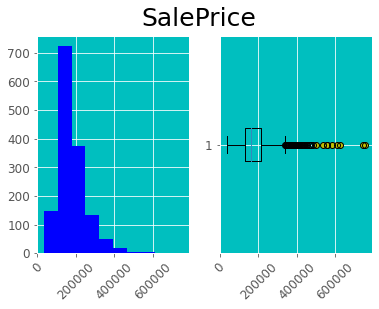

In [12]:
# The Distribution of the OUTPUT/DEPENDENT variable
fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice',fontsize=25)
axs[1].boxplot(train0['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[1].set_facecolor('c')

axs[1].scatter(train0.loc[indx,'SalePrice'], 
              [np.ones(len(indx[0]))],color='y') # large z-scores 

axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_facecolor('c')

print('25th percentile:',train0['SalePrice'].quantile(.25))
print('50th percentile / Median SalePrice:',train0['SalePrice'].median())
print('75th percentile:',train0['SalePrice'].quantile(.75))
print('# of Missing Rows: ', train0['SalePrice'].isna().sum(), 
    ' out of ',len(train0['SalePrice']))

In [13]:
train0['log_SalePrice'] = np.log(train0['SalePrice'])

SalePrice is right skewed (left plot).
For the output/dependent variable, the log of SalePrice taken.
This is so the residuals of a linear model would be normal.


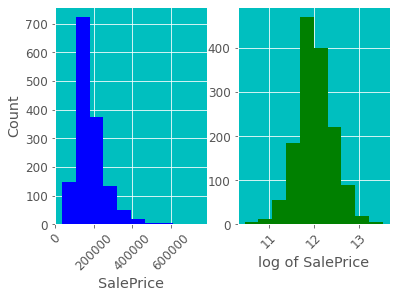

In [14]:
fig, axs = plt.subplots(1,2)   
axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_ylabel('Count')
axs[0].set_xlabel('SalePrice')
axs[0].set_facecolor('c')

axs[1].hist(train0['log_SalePrice'],color='g')
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xlabel('log of SalePrice')
axs[1].set_facecolor('c')

print('SalePrice is right skewed (left plot).')
print('For the output/dependent variable, the log of SalePrice taken.')
print('This is so the residuals of a linear model would be normal.')

## A. The Numeric Variables

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

39  numeric variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'Num_Bathrms_AbvGrd', 'Num_Bathrms_Bsmt', 'log_SalePrice']


### The Independent Variable (Xs) 

In [16]:
# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.3

<ipython-input-17-a30b8e3413ea>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


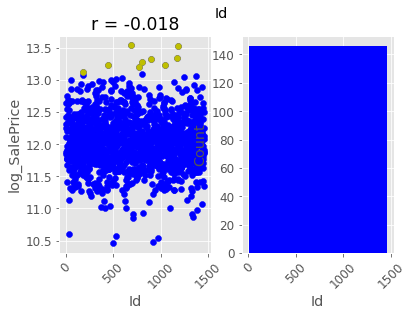

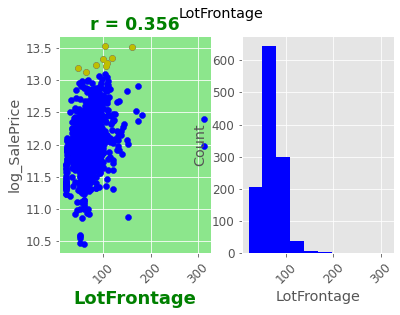

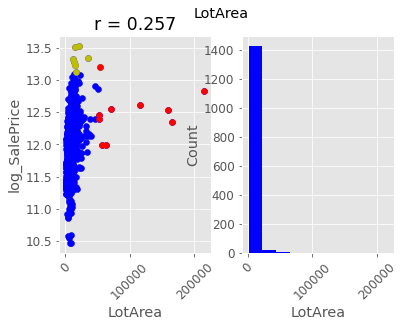

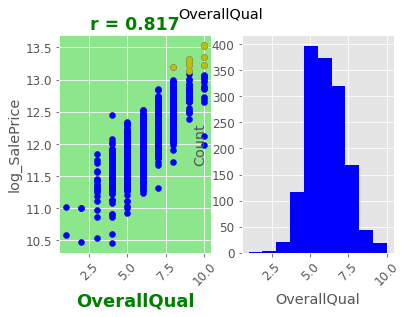

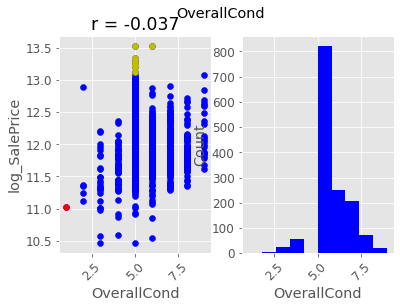

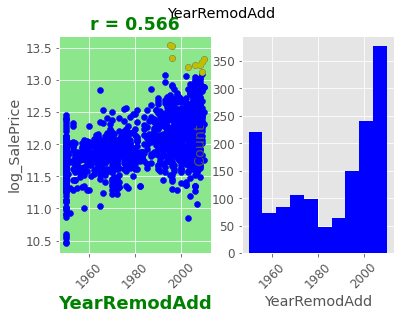

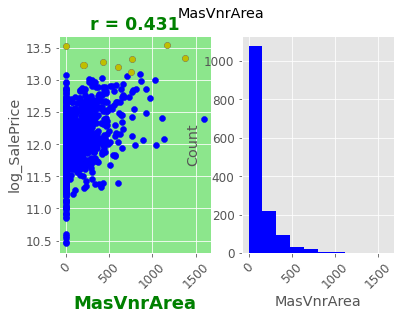

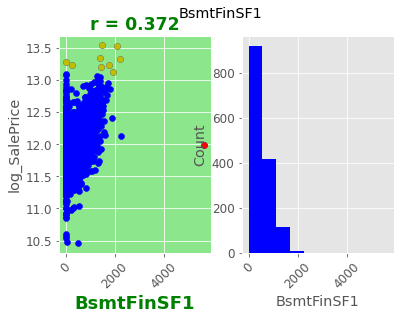

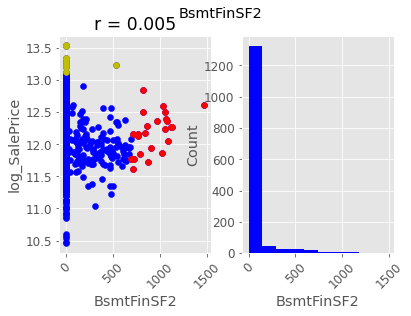

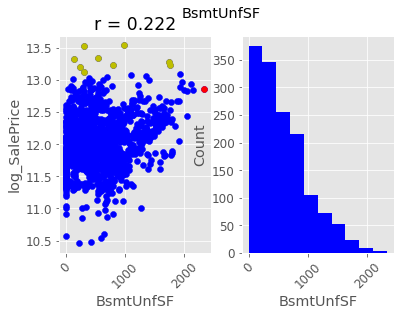

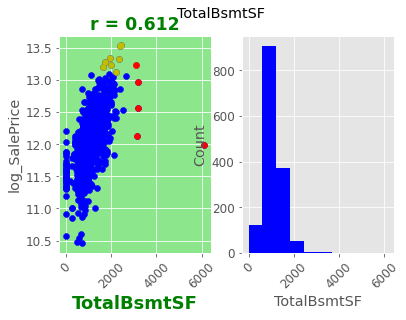

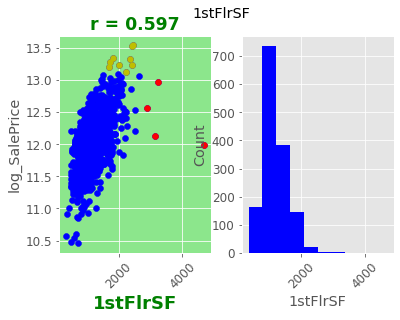

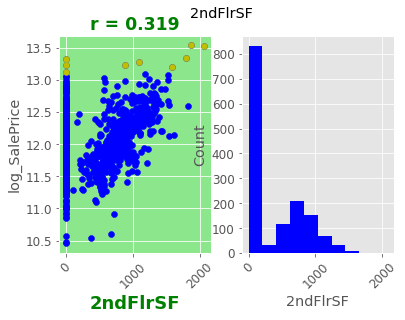

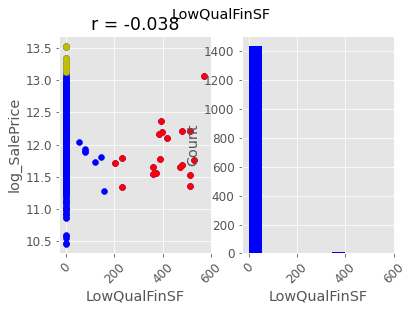

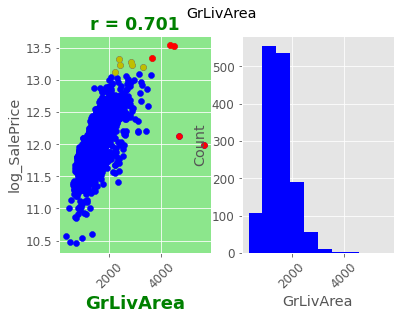

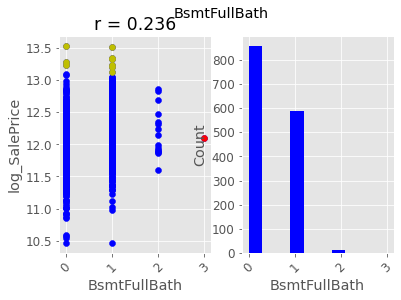

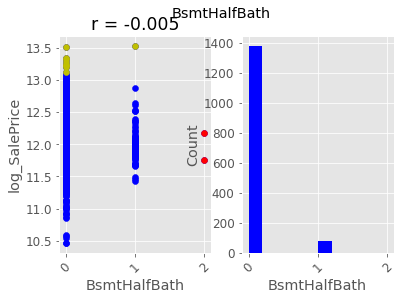

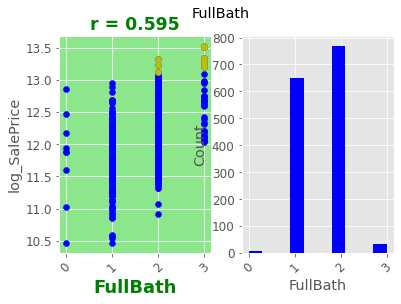

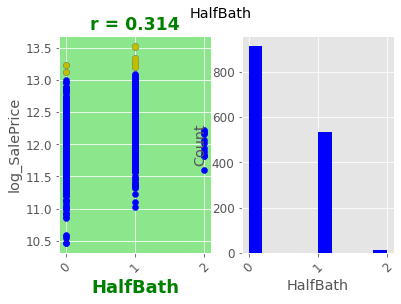

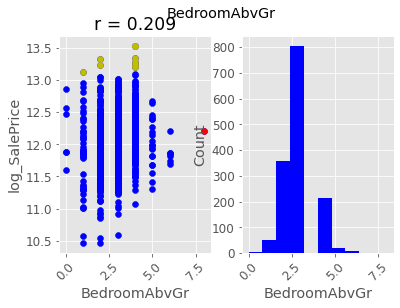

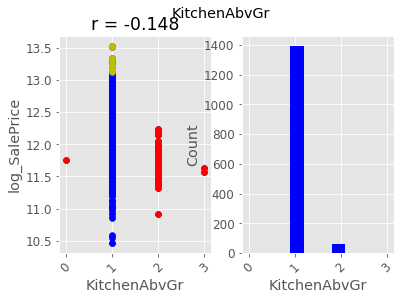

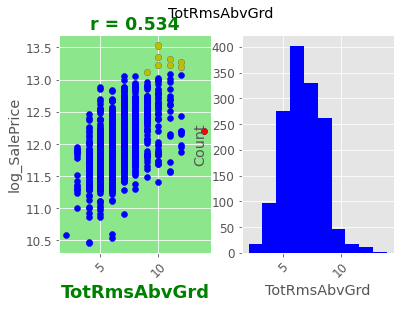

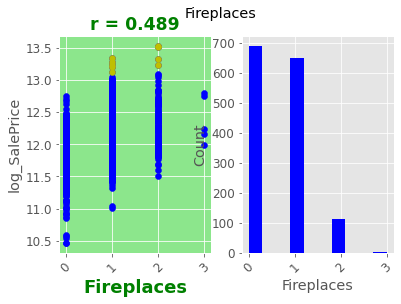

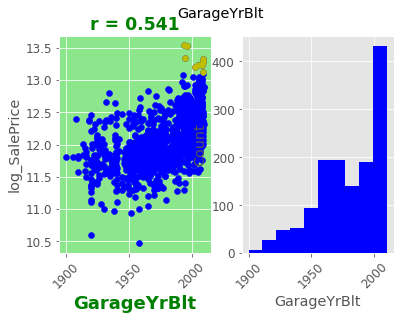

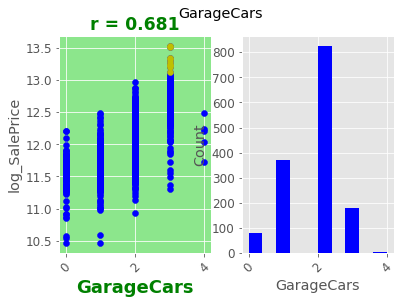

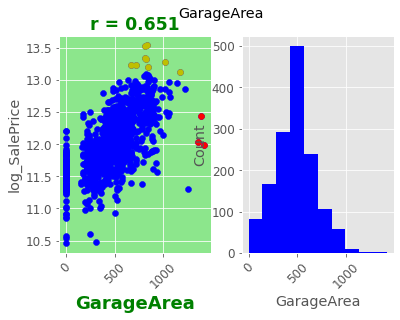

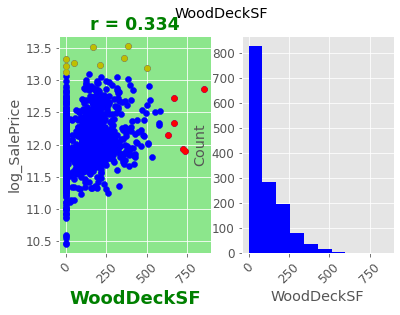

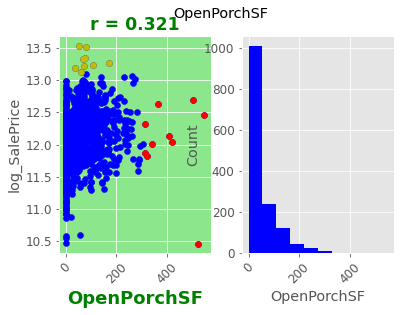

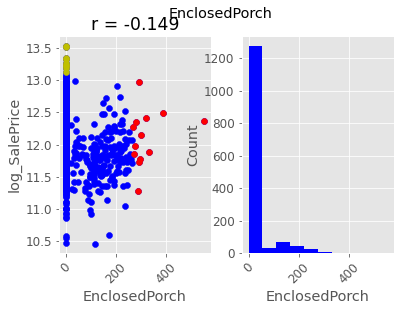

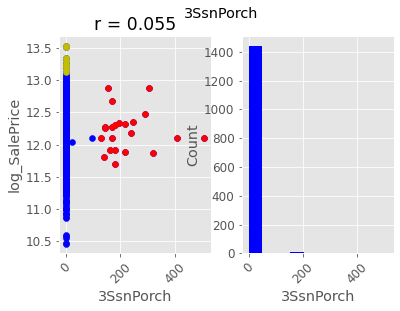

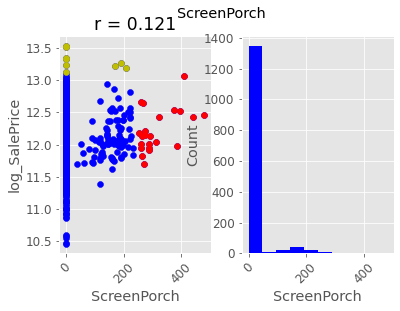

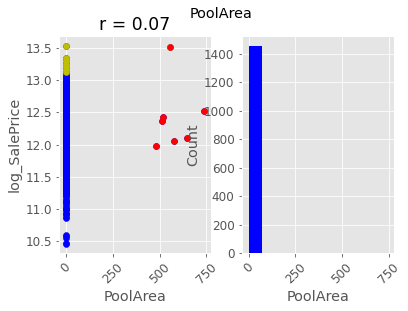

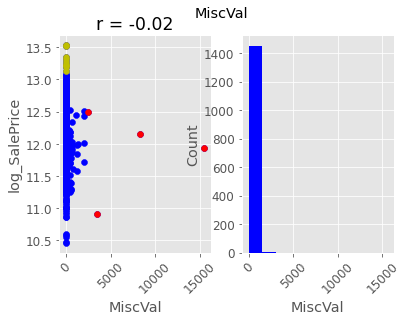

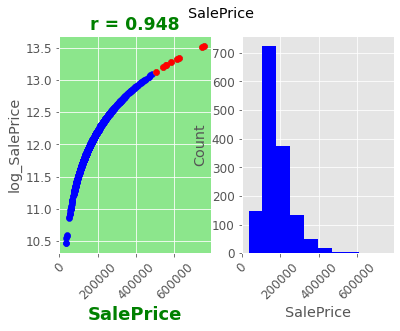

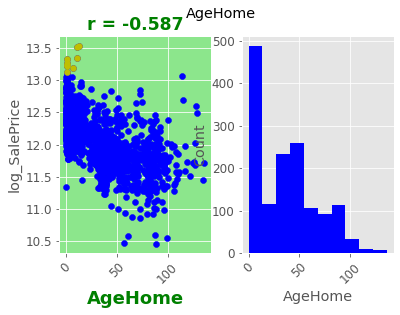

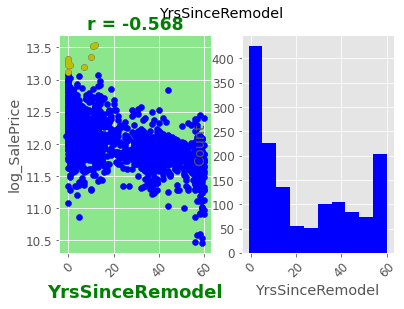

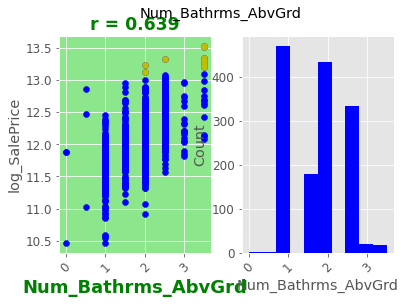

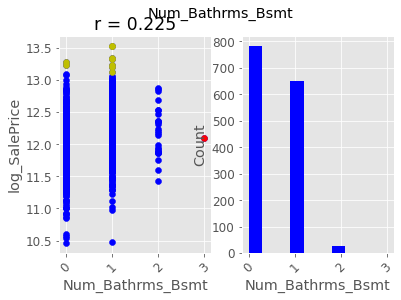

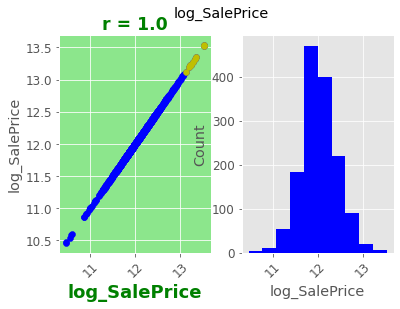

In [17]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

n_rcorr_values = []

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train0[nvar])
    zindx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train0[nvar],train0['log_SalePrice'],color='b')
    axs[0].scatter(train0.loc[indx,nvar],
                   train0.loc[indx,'log_SalePrice'],color='y') # *** SalePrice z-scores > 4
    axs[0].scatter(train0.loc[zindx,nvar],
                   train0.loc[zindx,'log_SalePrice'],color='r') # z-scores > 4

    r = ma.corrcoef(ma.masked_invalid(train0[nvar]), 
                ma.masked_invalid(train0['log_SalePrice']))
    
    n_rcorr_values.append(r[0,1])
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('log_SalePrice')

In [18]:
# num_train.describe()

In [19]:
# Combine the var names and correlations values:
n_rcorr_values_abs = np.abs(n_rcorr_values)
zipped = list(zip(numlist,
                 n_rcorr_values,
                 n_rcorr_values_abs))

num_results = pd.DataFrame(zipped, columns=['num var',
                                       'corr value',
                                       'corr magnitude'])

pd.options.display.float_format = '{:,.5f}'.format

print('Only presenting the variables that have correlation')
print('coefficients (absolute value) > corr_thrshld')

num_results_sorted = num_results.sort_values('corr magnitude', ascending = False)
num_results_sorted.loc[num_results_sorted['corr magnitude']>corr_thrshld]

Only presenting the variables that have correlation
coefficients (absolute value) > corr_thrshld


,num var,corr value,corr magnitude
38,log_SalePrice,1.00000,1.00000
33,SalePrice,0.94837,0.94837
3,OverallQual,0.81718,0.81718
14,GrLivArea,0.70093,0.70093
24,GarageCars,0.68062,0.68062
25,GarageArea,0.65089,0.65089
36,Num_Bathrms_AbvGrd,0.63932,0.63932
10,TotalBsmtSF,0.61213,0.61213
11,1stFlrSF,0.59698,0.59698
17,FullBath,0.59477,0.59477


Taking a closer look at GrLivArea 🤔 and SaleCondition

In [20]:
large_zscores = np.where(abs(stats.zscore(train0['GrLivArea'])) > 4.5)
print(large_zscores)

(array([ 523,  691, 1182, 1298]),)


Text(0.5, 0, 'Square Footage')

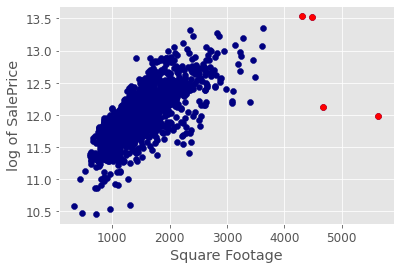

In [21]:
plt.scatter(train0['GrLivArea'],train0['log_SalePrice'],color='navy')
plt.scatter(train0.loc[large_zscores,'GrLivArea'],
                   train0.loc[large_zscores,'log_SalePrice'],color='r') 

plt.ylabel('log of SalePrice')
plt.xlabel('Square Footage')

In [22]:
train0.loc[[523,  691, 1182, 1298],:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice
523,524,60,RL,130.00000,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.00000,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,"2,007.00000",Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0,-1,3.50000,1,12.12676
691,692,60,RL,104.00000,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,"1,170.00000",Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,"1,994.00000",Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,13,12,3.50000,1,13.53447
1182,1183,60,RL,160.00000,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.00000,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,"1,996.00000",Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,11,11,3.50000,1,13.52114
1298,1299,60,RL,313.00000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.00000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,"2,008.00000",Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,0,0,2.50000,2,11.98293


## B. The Categorical Variables

In [23]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
catlist

47  categorical variables


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

<ipython-input-24-9407ee980393>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


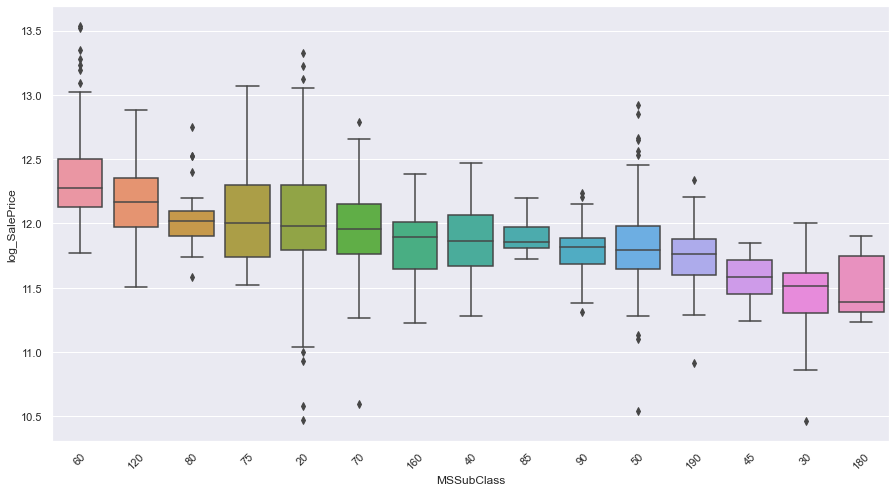

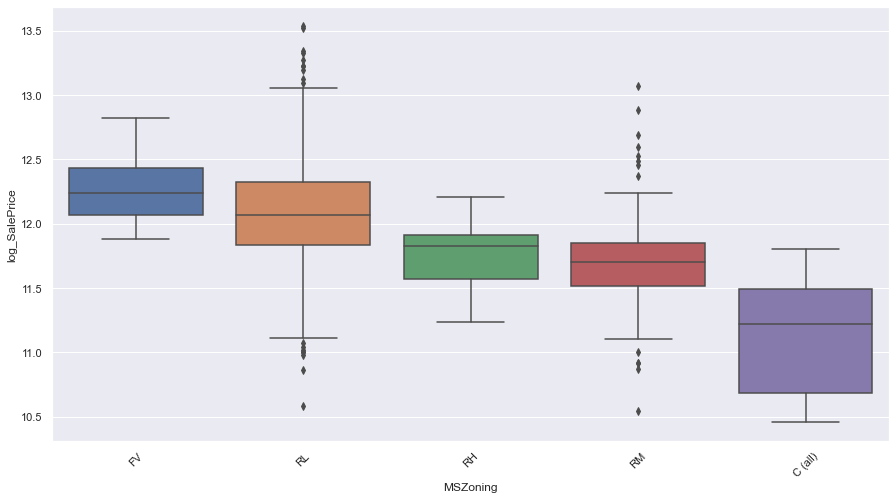

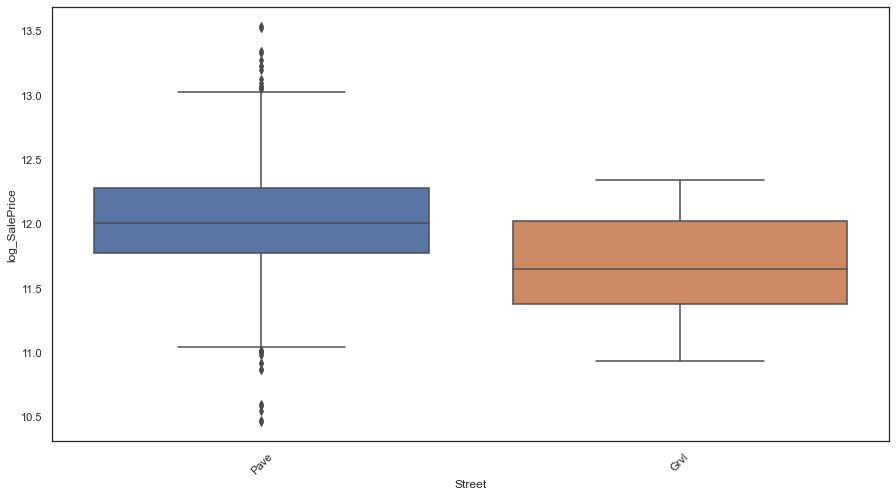

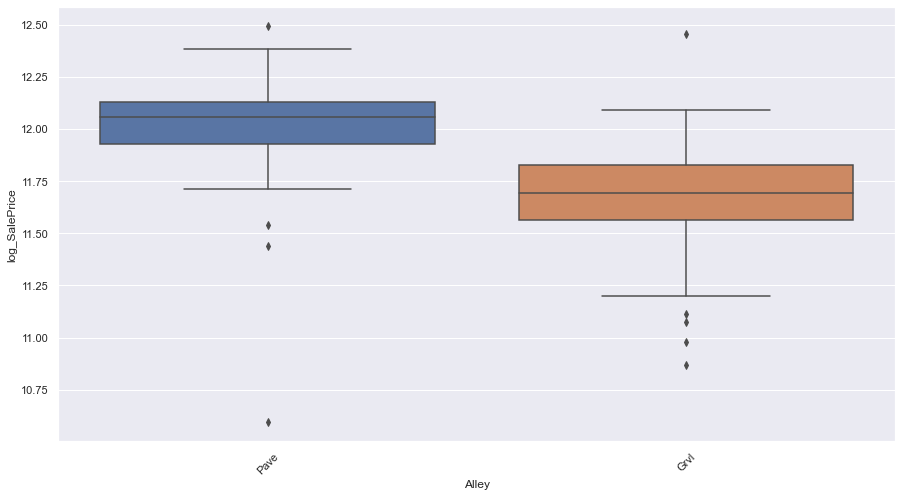

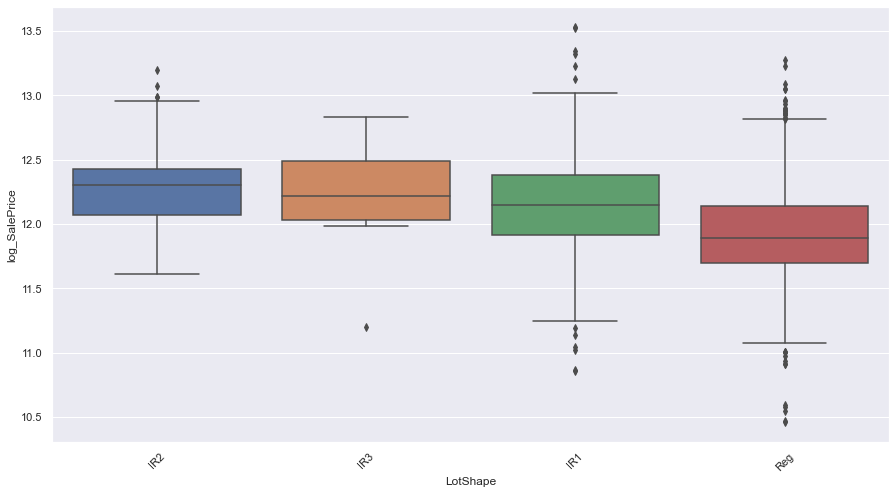

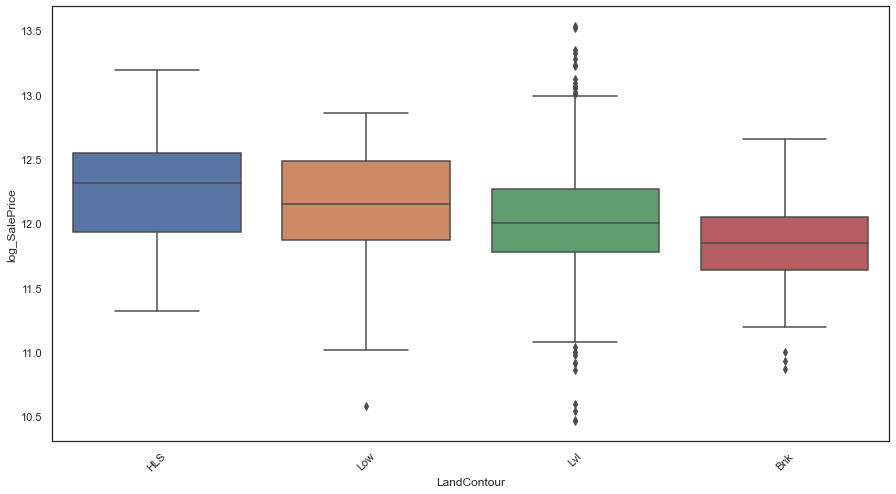

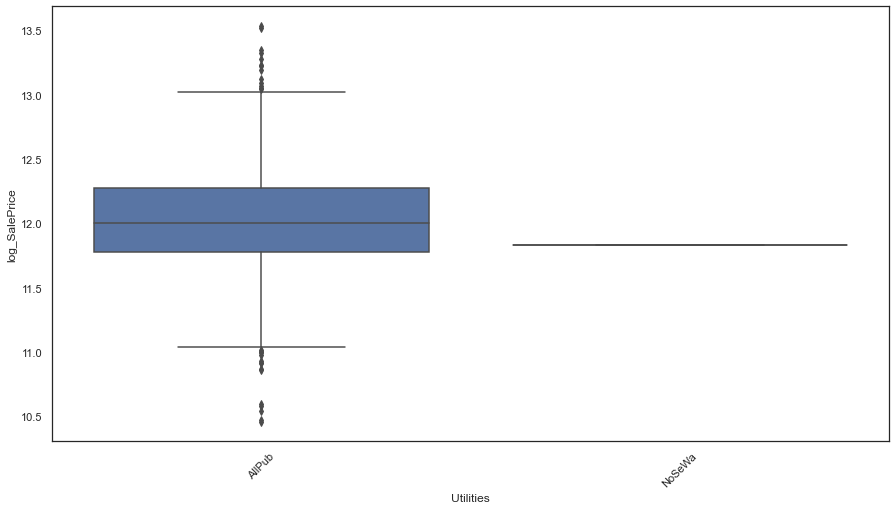

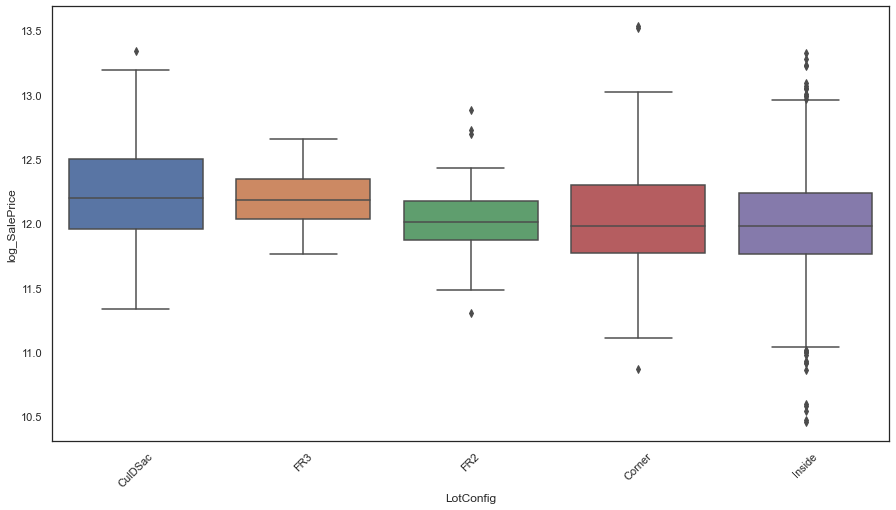

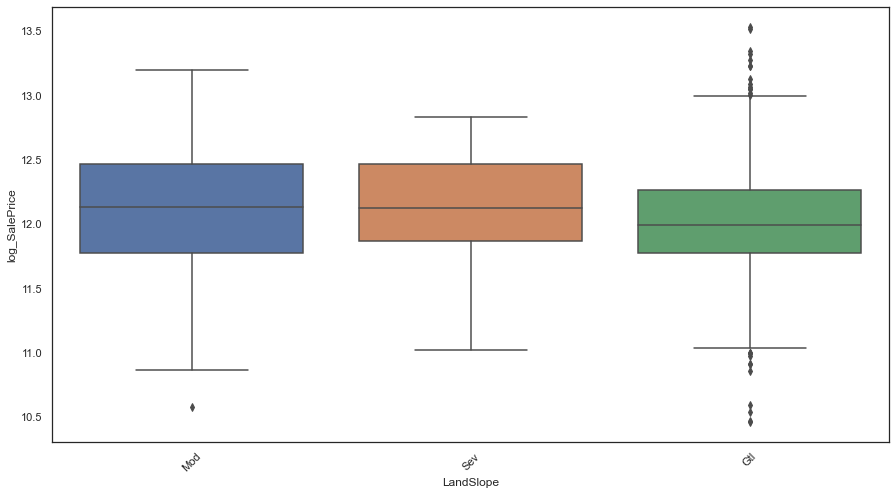

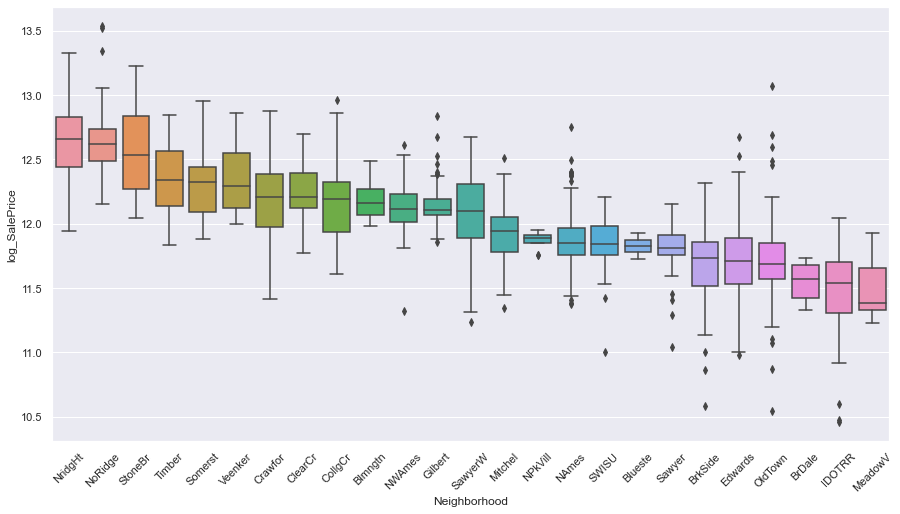

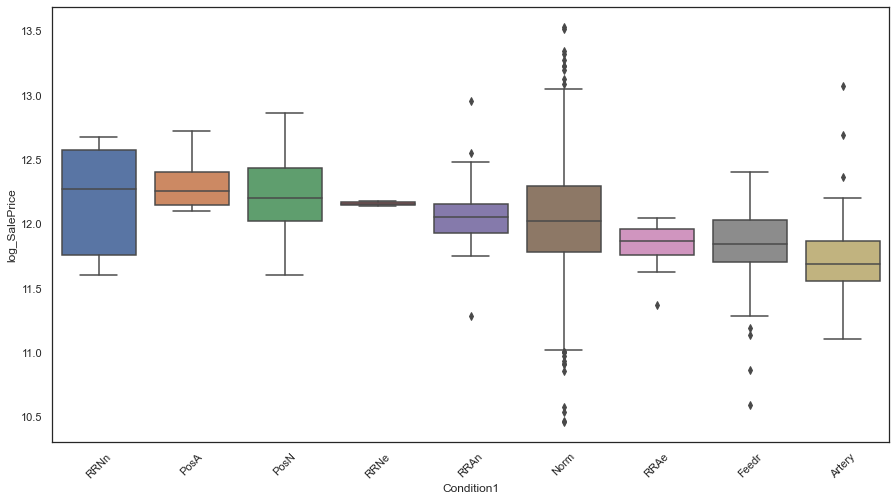

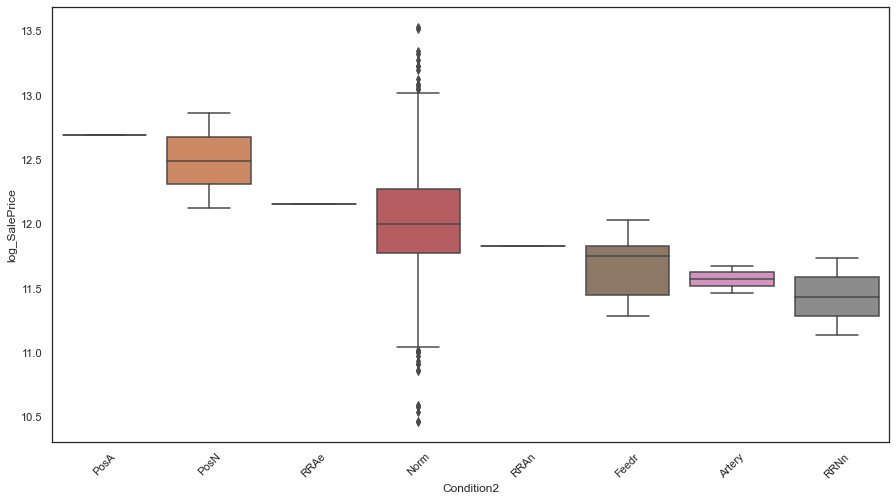

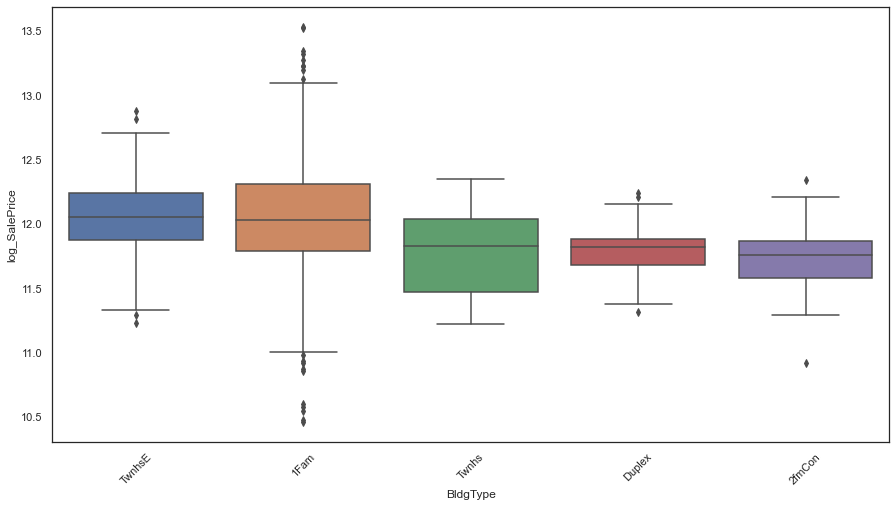

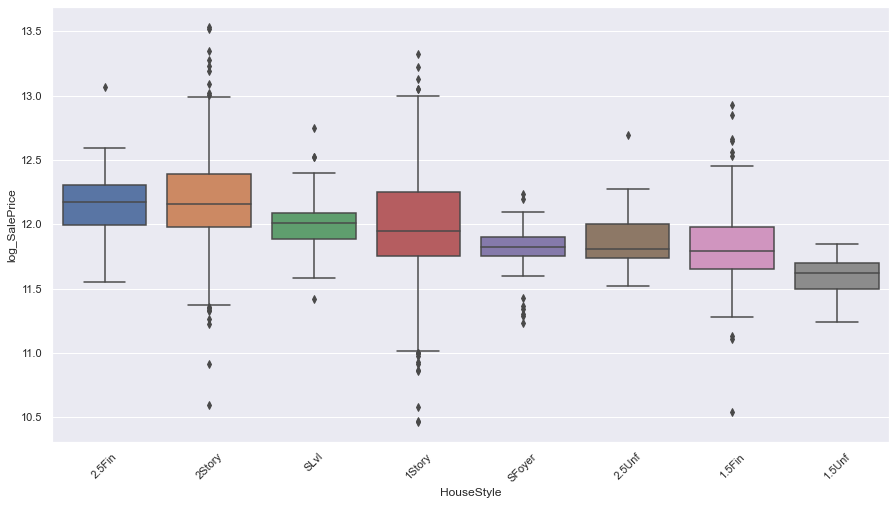

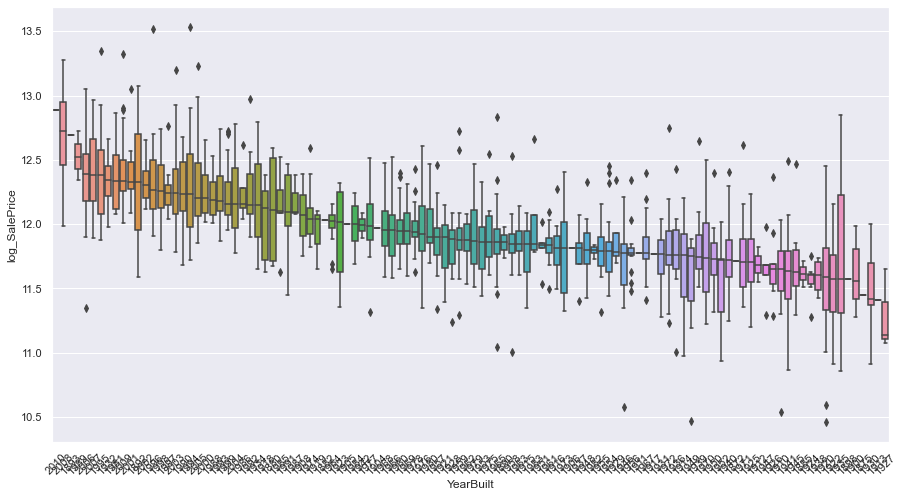

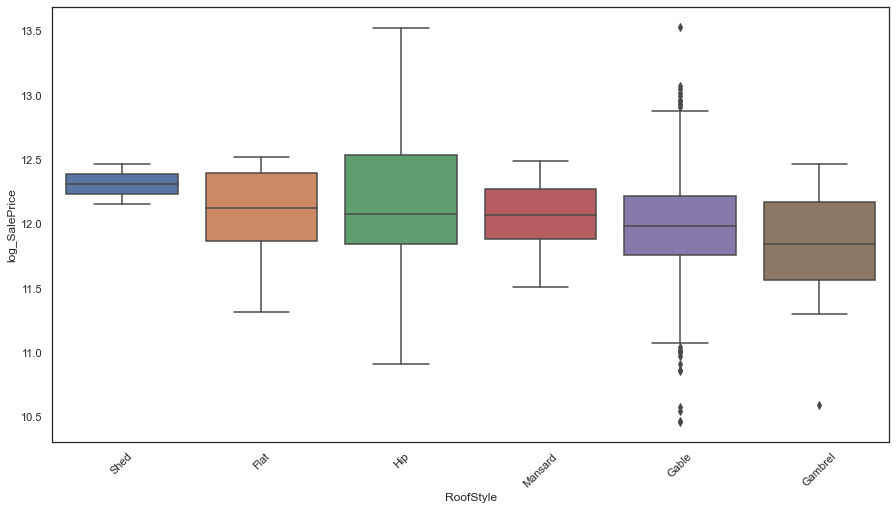

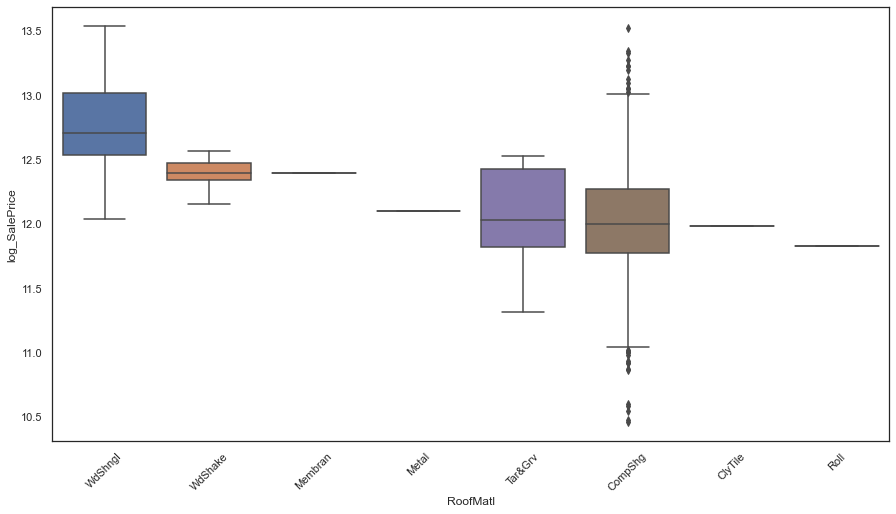

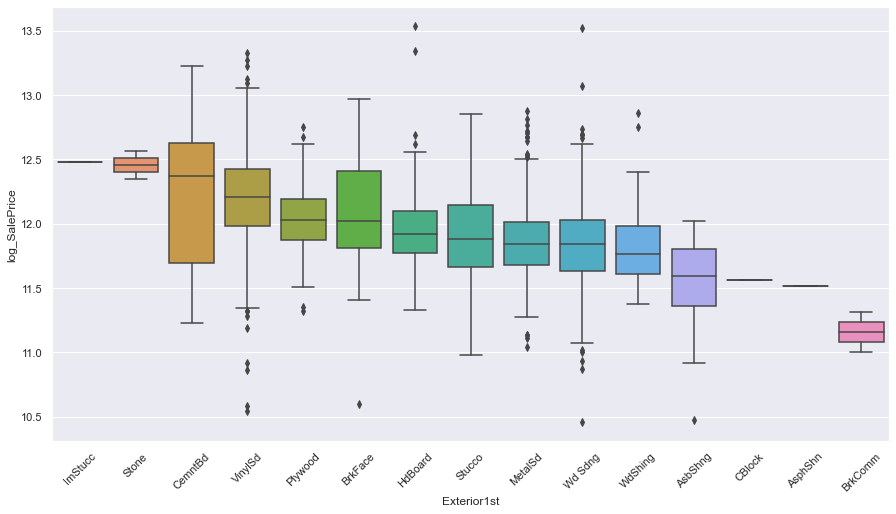

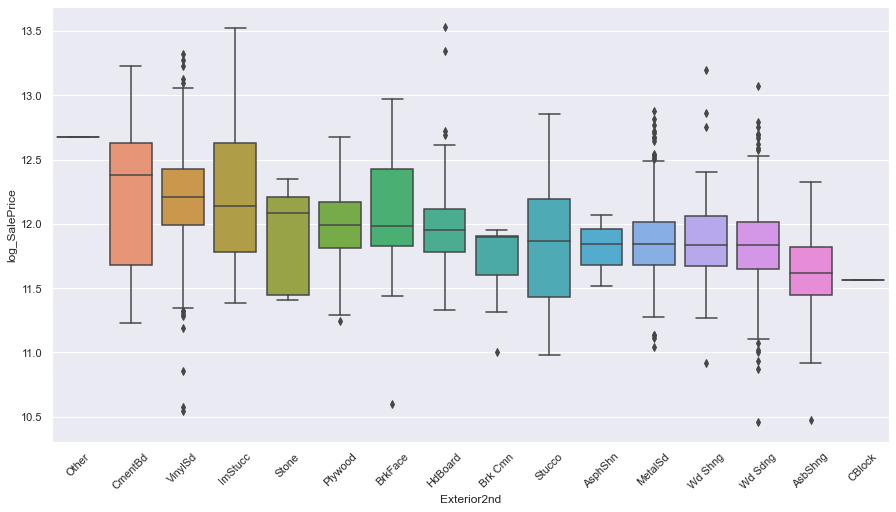

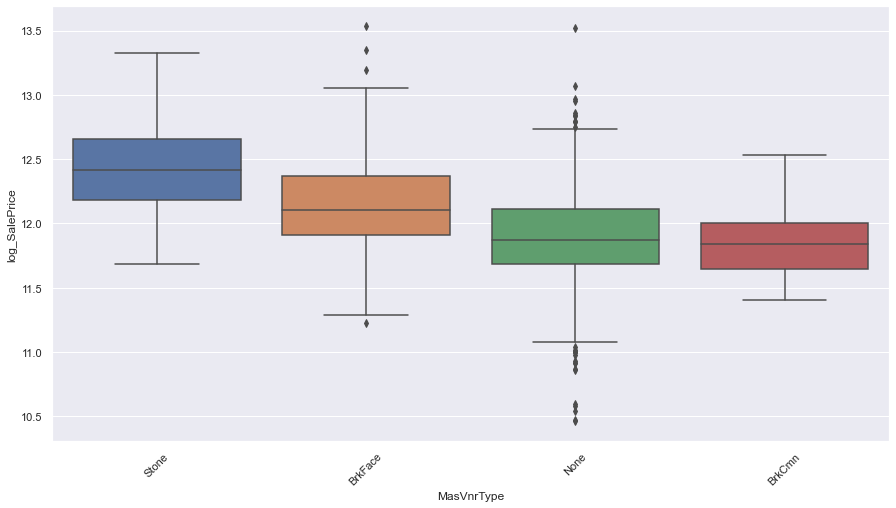

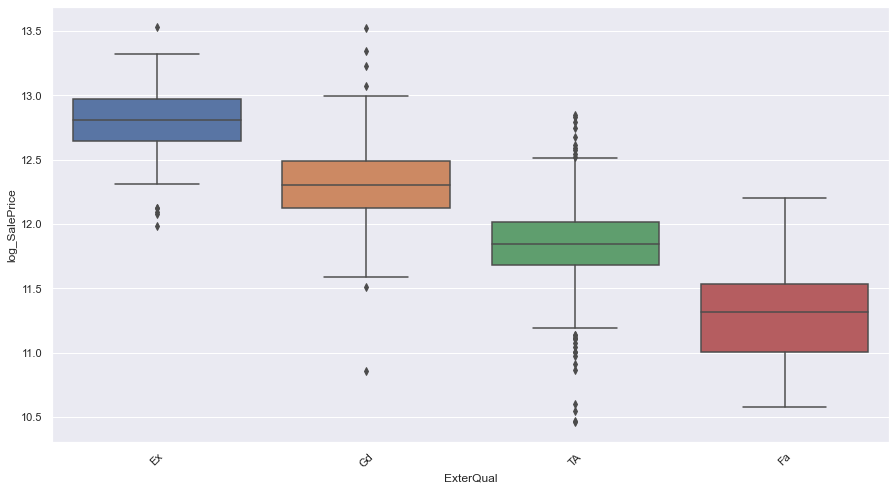

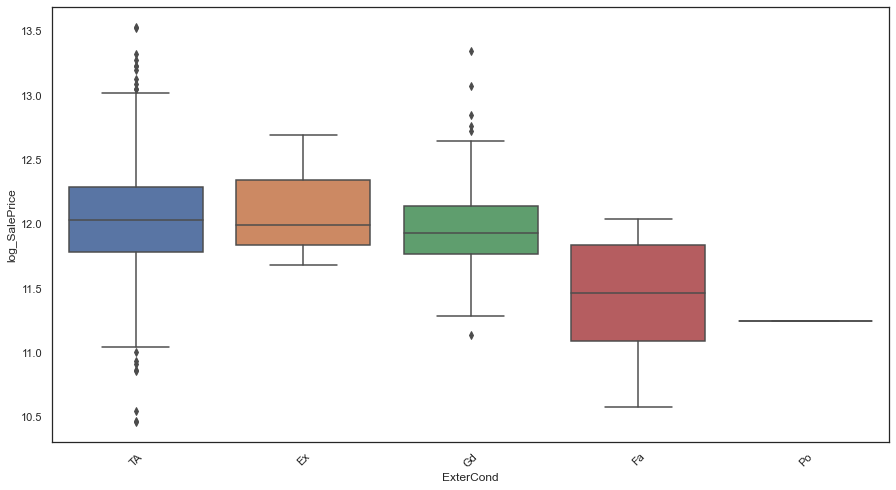

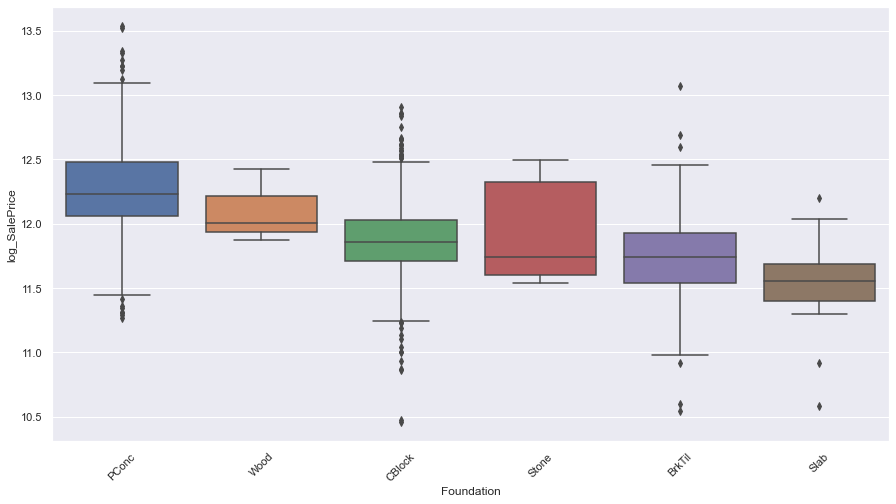

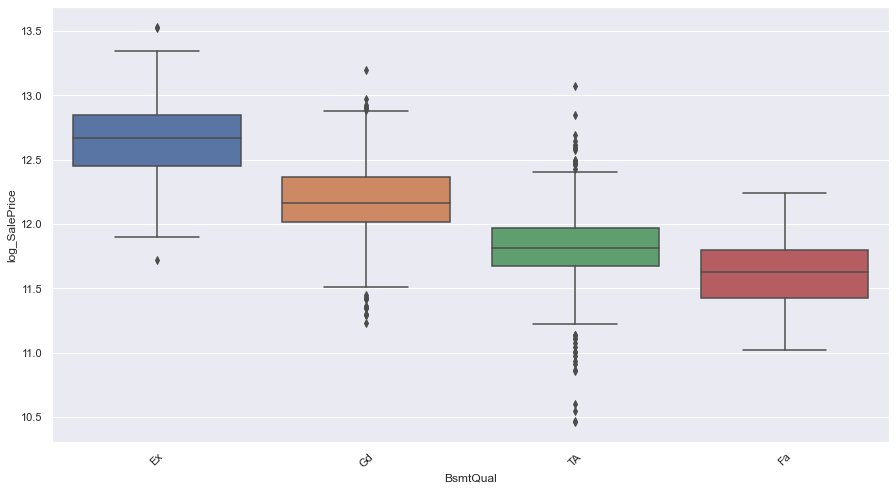

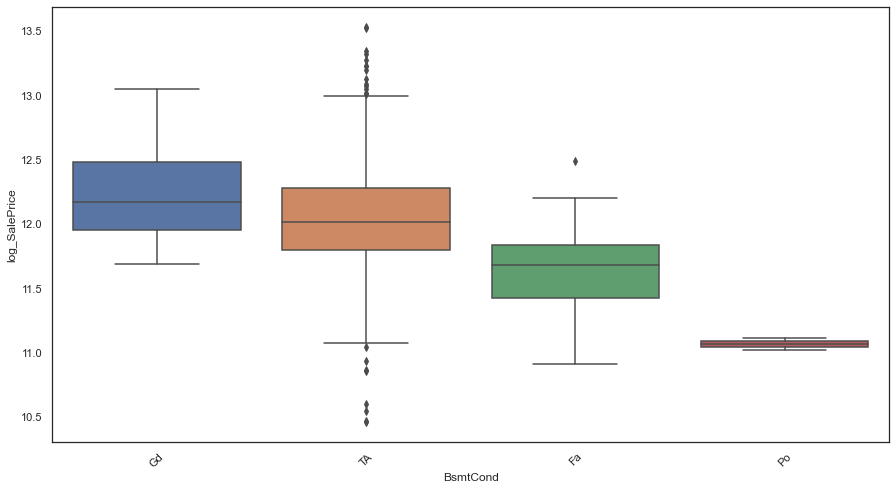

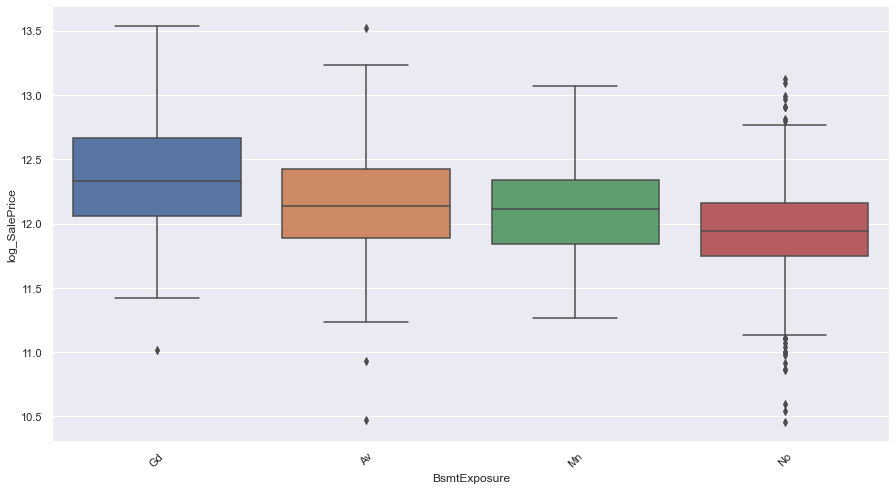

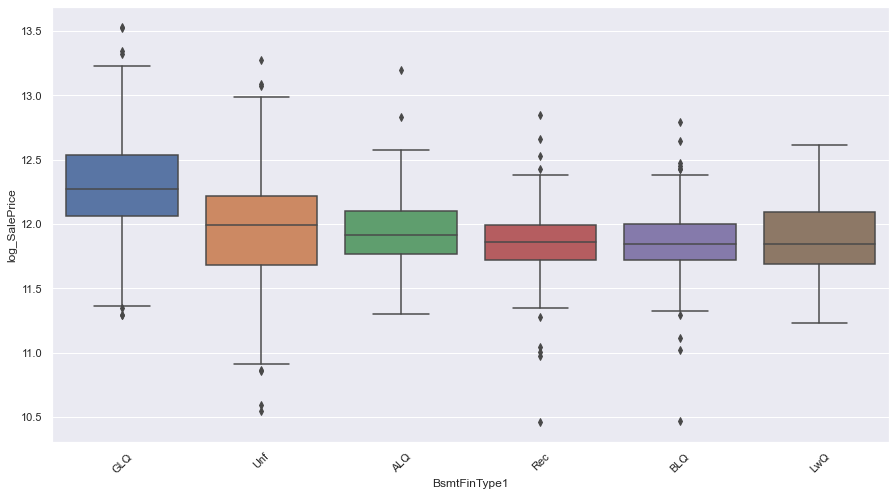

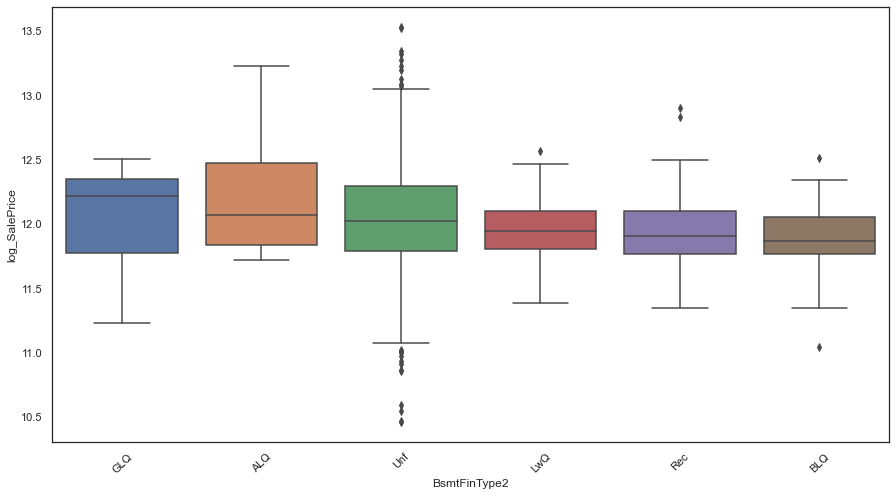

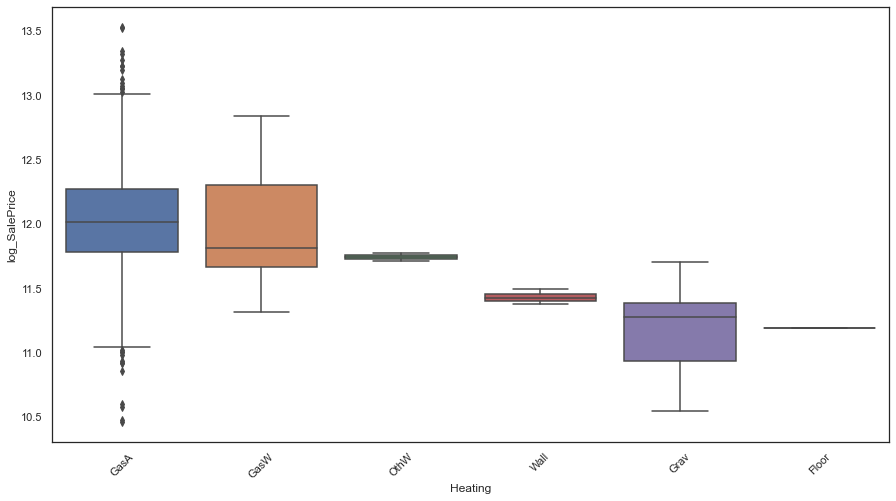

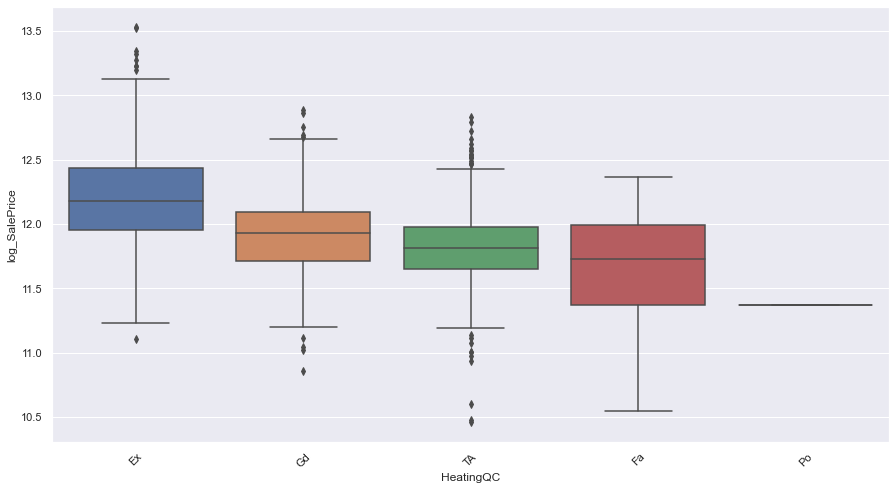

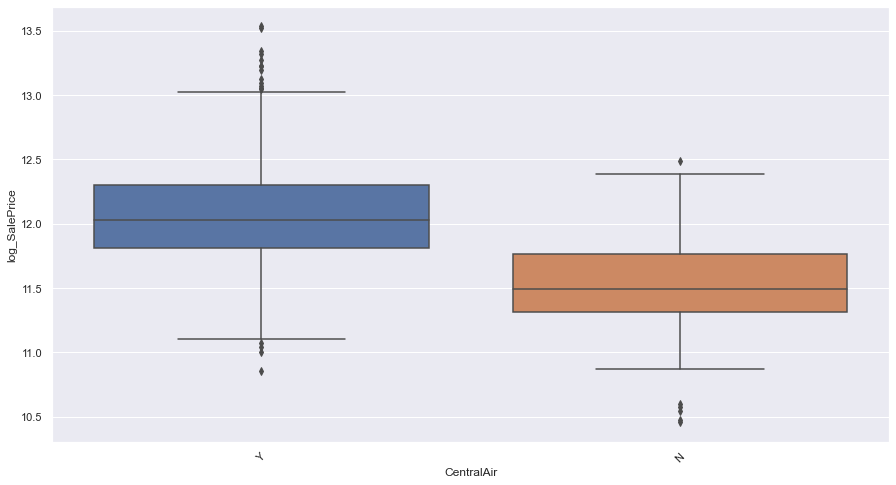

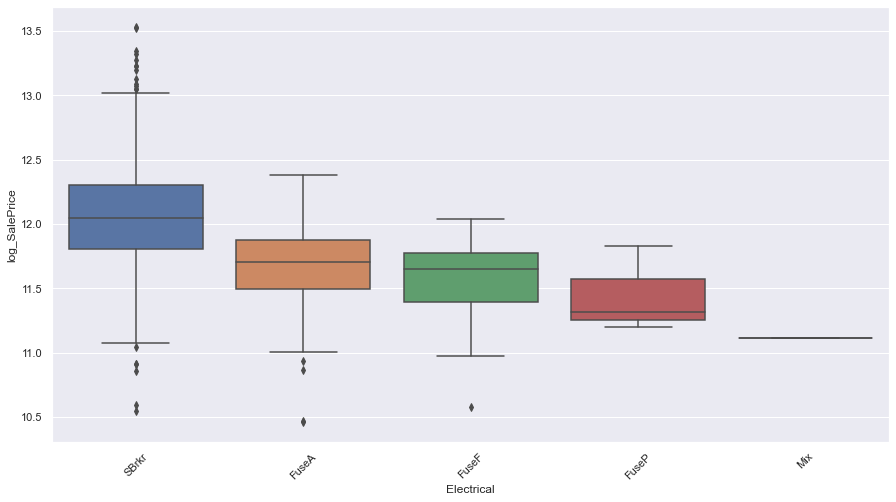

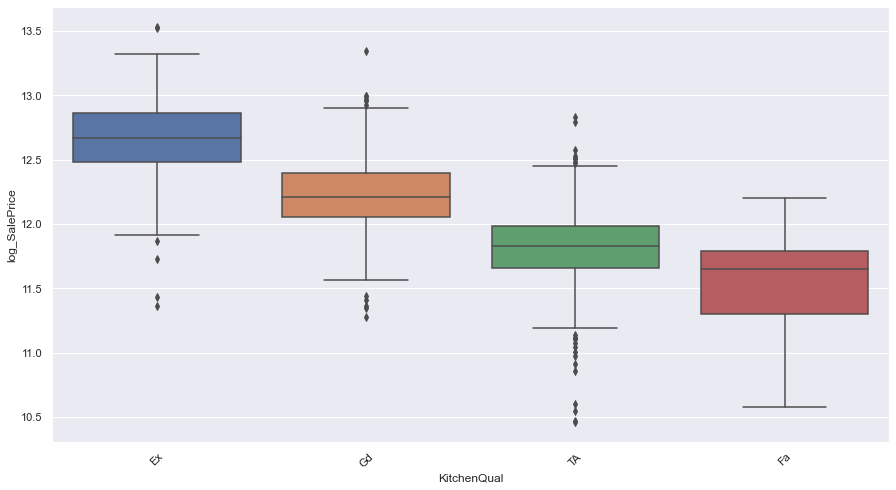

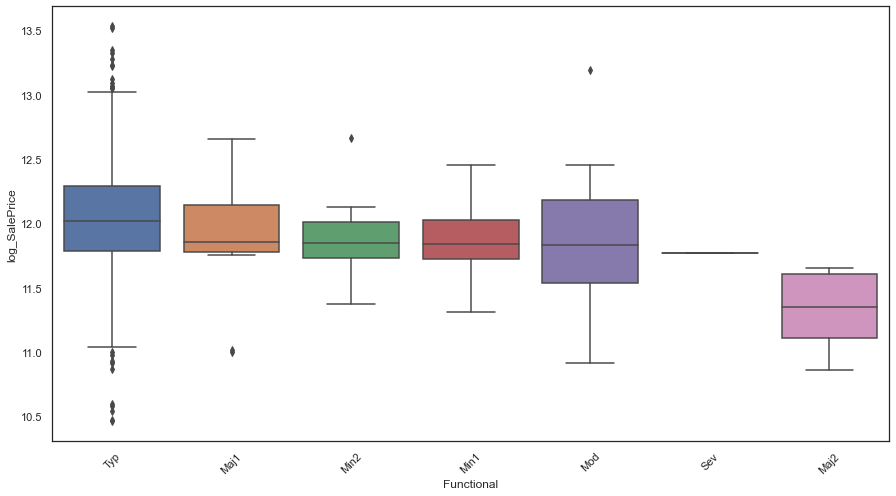

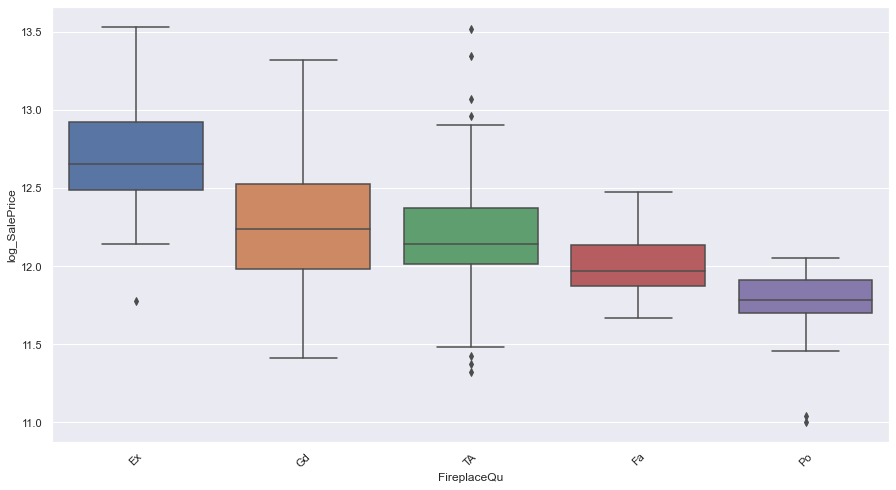

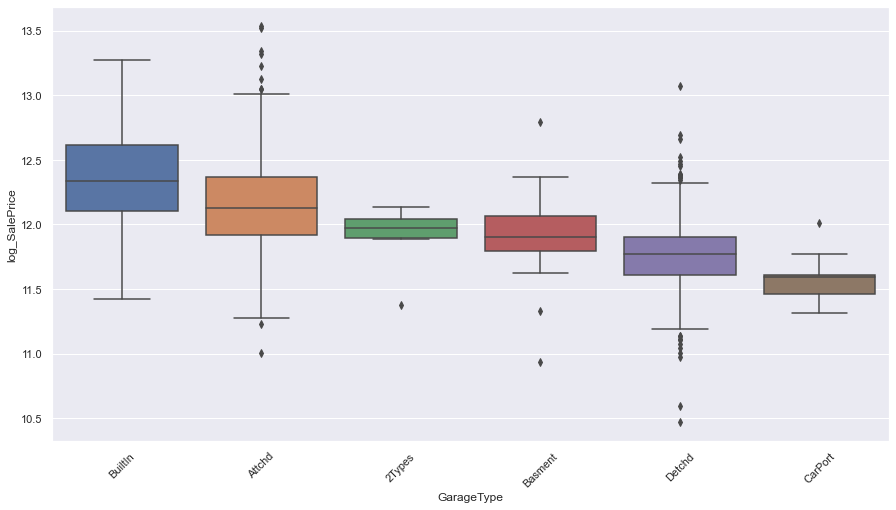

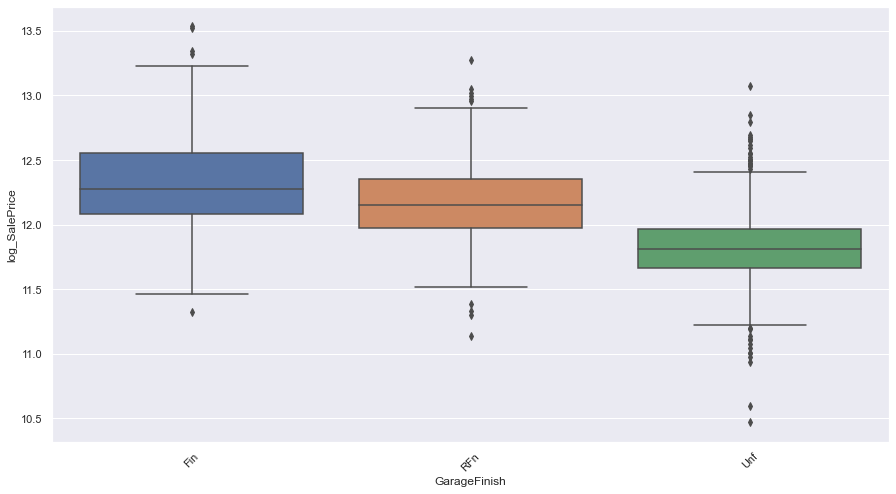

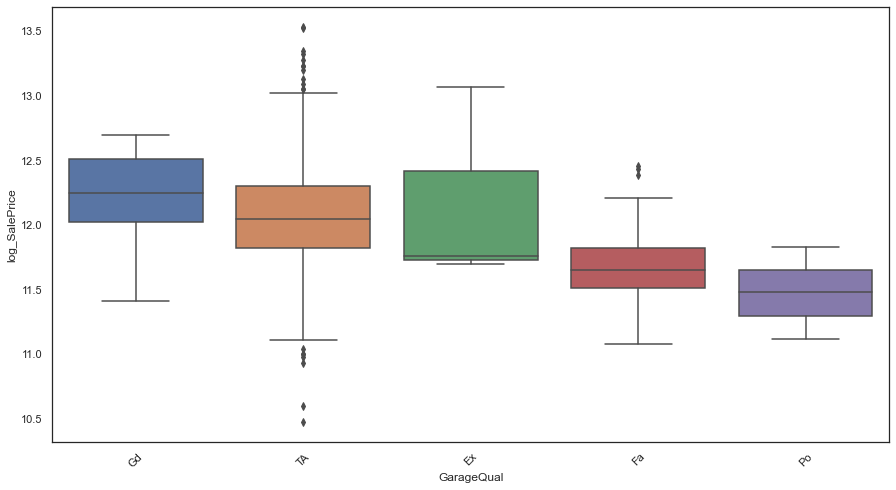

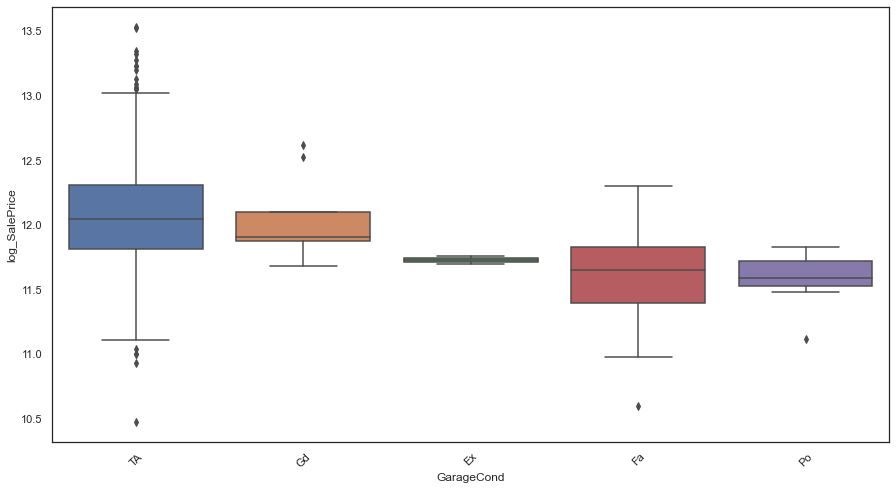

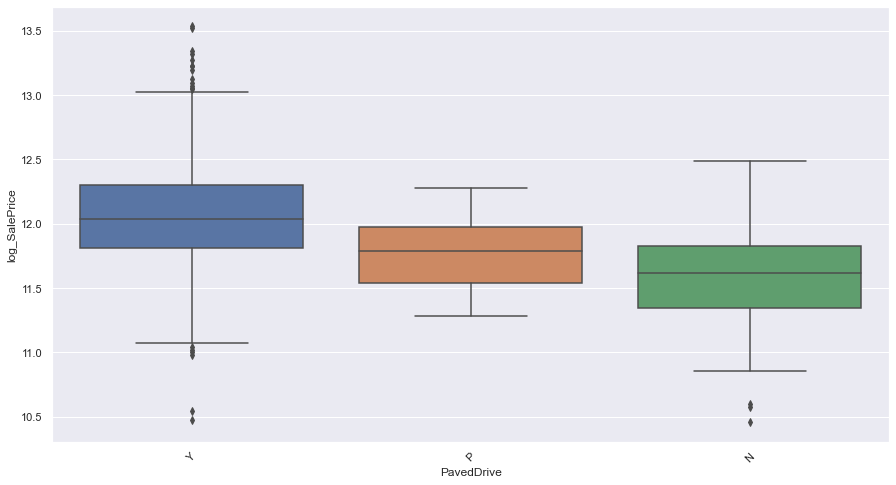

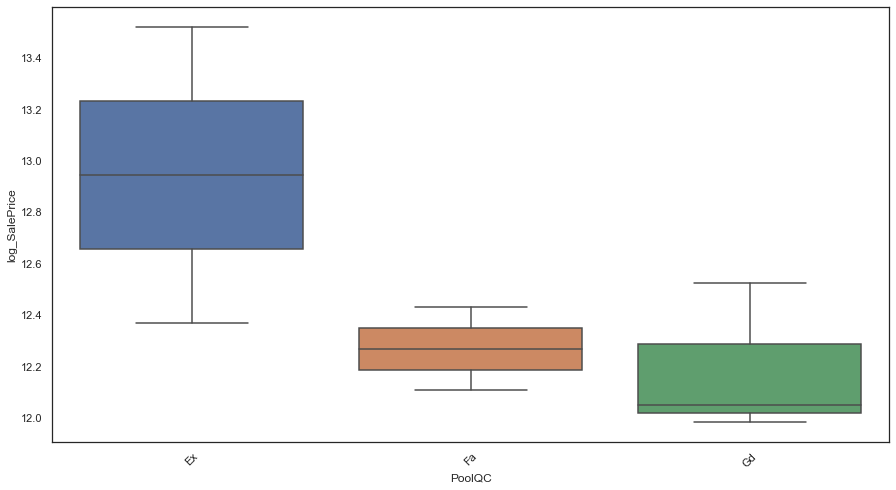

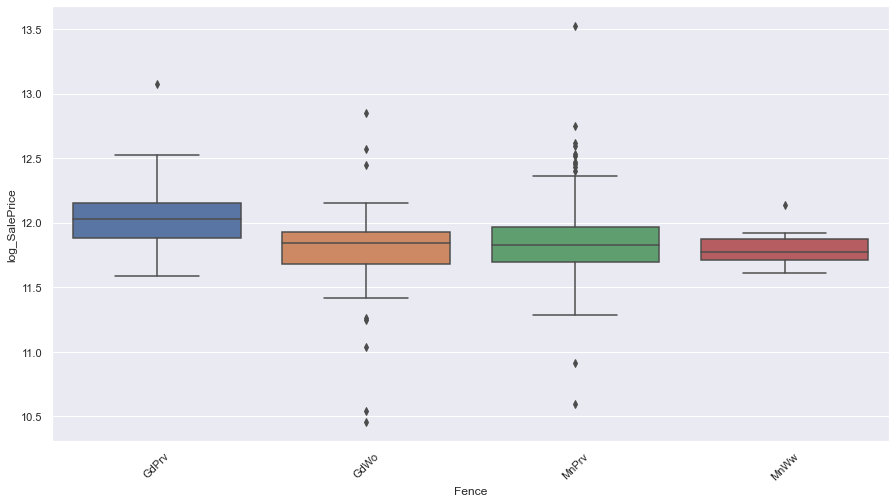

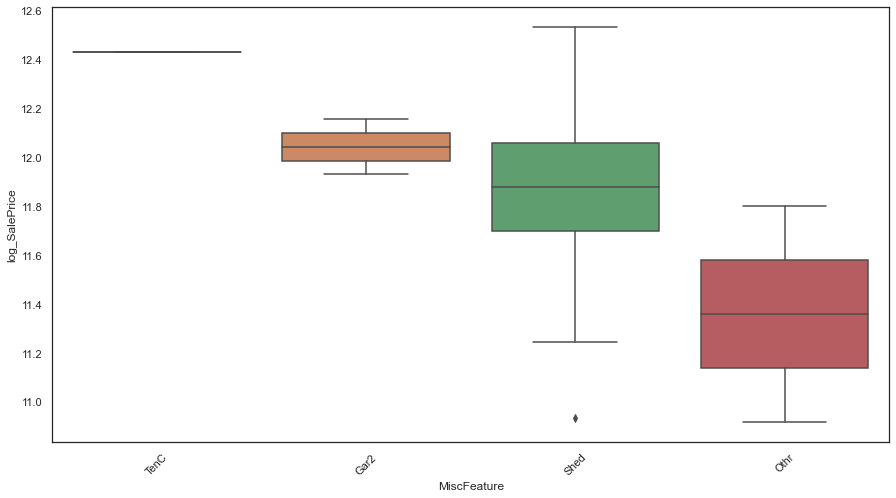

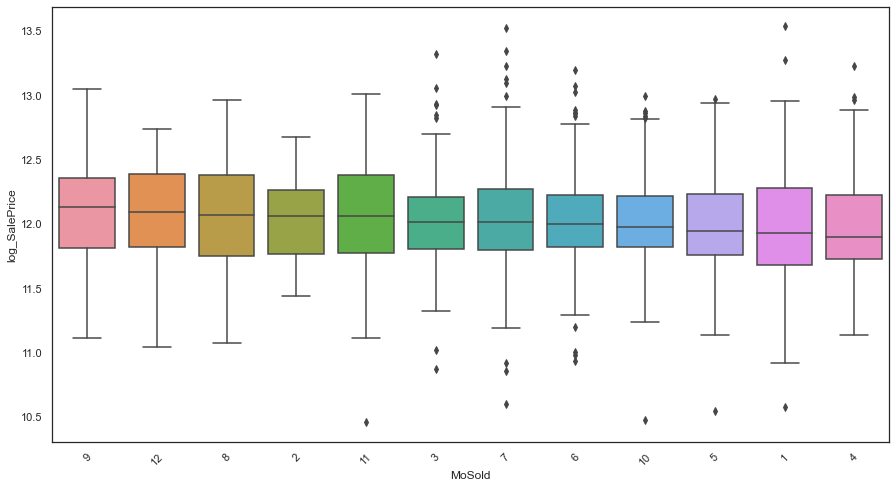

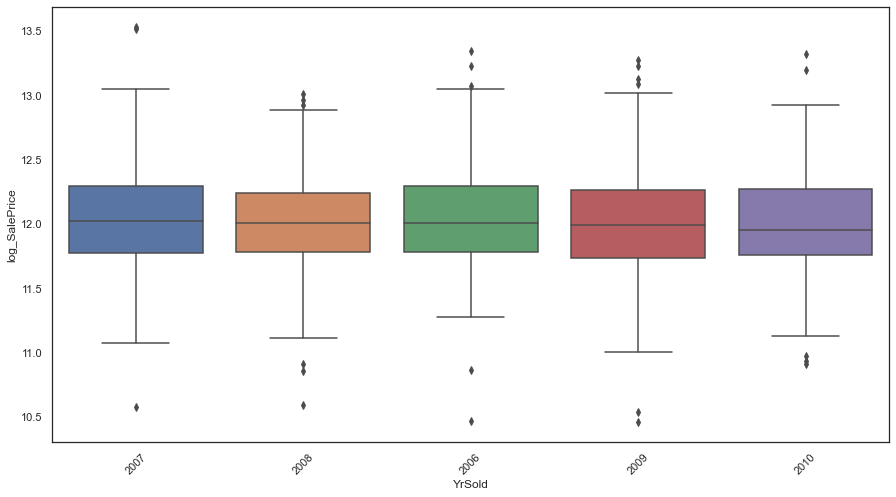

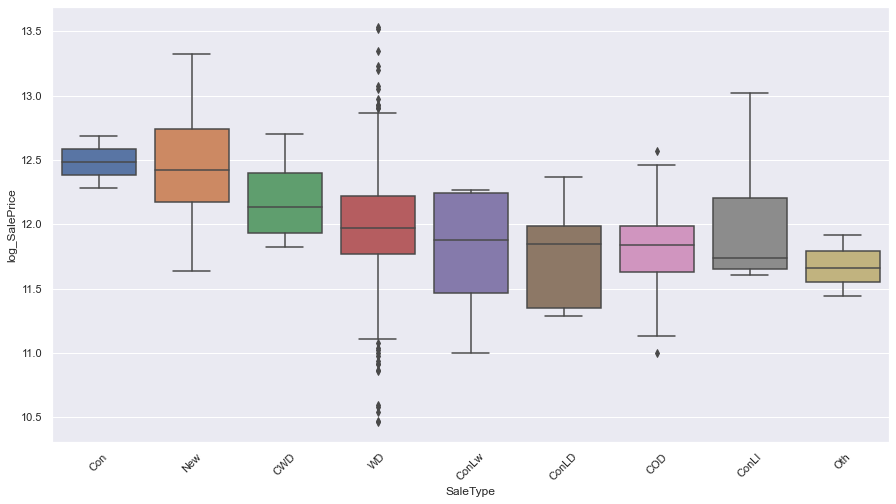

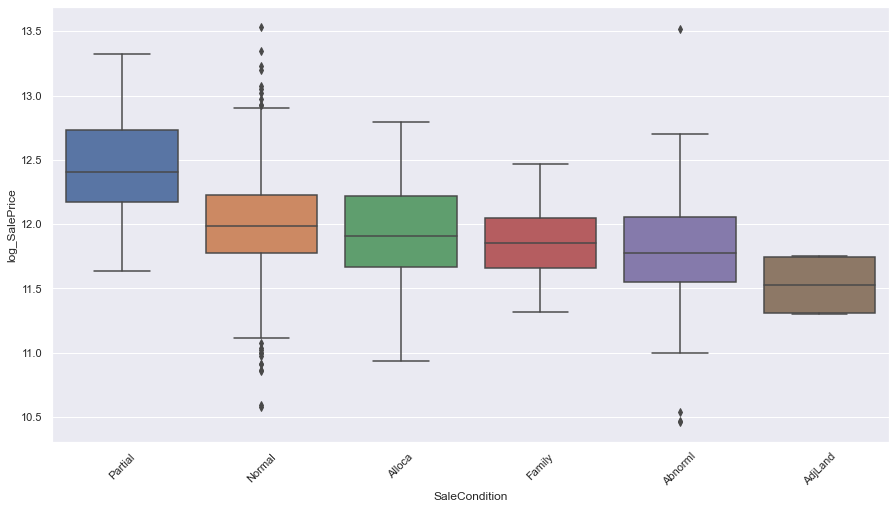

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
c_pvalues = []
c_eff_sizes = []

for cvar in catlist:   
    # Running a between groups ANOVA
    mstr = 'log_SalePrice ~ ' + cvar
    mod = ols(mstr,data=train0).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    c_pvalues.append(aov_table['PR(>F)'][0])
    c_eff_sizes.append(eff_size_temp)
    
    # ---------------------------------
    # The Figure
    # ---------------------------------
    sns.set(rc={'figure.facecolor':'white'})

    plt.figure(figsize = (15,8))   
    
    # Ordering by median
    temp = train0.groupby([cvar])['log_SalePrice'].median().sort_values(ascending=False).reset_index()   
    
    # Boxplot
    if aov_table['PR(>F)'][0] < 0.01 and eff_size_temp > 0.059:
        with sns.axes_style("darkgrid"):
            sns.boxplot(x=train0[cvar], 
                y=train0['log_SalePrice'],
                order = list(temp[cvar]))      
    else:
        with sns.axes_style("white"):
            sns.boxplot(x=train0[cvar], 
                y=train0['log_SalePrice'],
                order = list(temp[cvar]))
    
    plt.xticks(rotation=45)

In [25]:
# Combine the p-values and effect sizes:
zipped = list(zip(catlist,
                 c_pvalues, 
                 c_eff_sizes))

cat_results = pd.DataFrame(zipped, columns=['cat var',
                                       'anova_pvalues',
                                       'effect_sizes'])

print('Only presenting the variables that have ')
print('Anova p-values < 0.01 and effect sizes > 0.059')

pd.options.display.float_format = '{:,.5f}'.format

cat_results_sorted = cat_results.sort_values('anova_pvalues', ascending = True)
cat_results_sorted.head(50)
cat_temp = cat_results_sorted.loc[(cat_results_sorted['anova_pvalues']<0.01) &
                      cat_results_sorted['effect_sizes'] > 0.059]
cat_temp.sort_values('effect_sizes', ascending = False)

Only presenting the variables that have 
Anova p-values < 0.01 and effect sizes > 0.059


,cat var,anova_pvalues,effect_sizes
9,Neighborhood,0.00000,0.57081
14,YearBuilt,0.00000,0.49846
20,ExterQual,0.00000,0.46112
32,KitchenQual,0.00000,0.44764
23,BsmtQual,0.00000,0.43538
0,MSSubClass,0.00000,0.33013
36,GarageFinish,0.00000,0.32345
22,Foundation,0.00000,0.30365
35,GarageType,0.00000,0.26922
29,HeatingQC,0.00000,0.23352


Looking more at counts...

Fewer houses sold in 2010...


<ipython-input-26-f1573fb08238>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


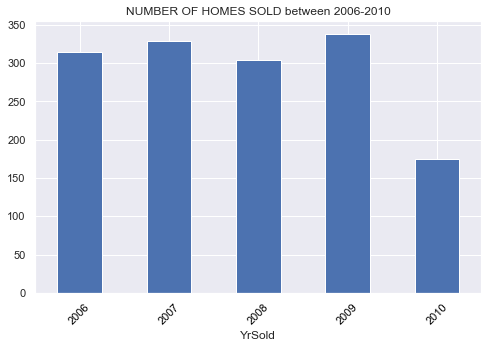

In [26]:
fig = plt.figure(figsize = (8,5))
train0.groupby('YrSold').size().plot.bar()
plt.title('NUMBER OF HOMES SOLD between 2006-2010');
ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=45)
print('Fewer houses sold in 2010...')

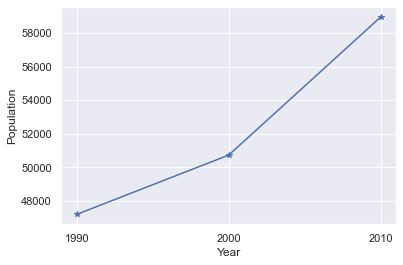

In [27]:
# US Census Population Numbers
year = [1990, 2000, 2010]
population = [47198, 50731, 58965]
zipped = list(zip(year, population))

df_pop = pd.DataFrame(zipped, columns=['Year', 'Population'])
df_pop.head()
plt.plot(df_pop['Year'], df_pop['Population'], marker ="*")
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks([1990, 2000, 2010]);

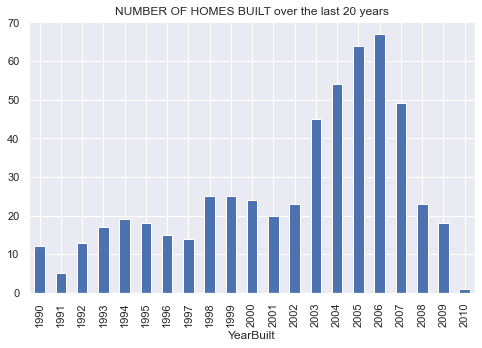

In [28]:
train_small = train0.loc[train0['YearBuilt'].isin(['1990','1991',
                                     '1992','1993',
                                     '1994','1995',
                                     '1996','1995',
                                     '1997','1998',
                                     '1999','2000',
                                     '2001','2002',
                                     '2003','2004',
                                     '2005','2006',
                                     '2007','2008',
                                     '2009','2010'])]
fig = plt.figure(figsize = (8,5))
train_small.groupby(['YearBuilt']).size().plot.bar()
plt.title('NUMBER OF HOMES BUILT over the last 20 years');

In [29]:
# Where were the homes built?
train_new = train0.loc[train0['YearBuilt'].isin(['2002',
                                     '2003','2004',
                                     '2005','2006',
                                     '2007','2008',
                                     '2009','2010'])]
train_new.groupby(['Neighborhood']).size().sort_values()

Neighborhood
OldTown     1
Crawfor     3
Mitchel     6
SawyerW     9
StoneBr    12
Blmngtn    17
Edwards    17
Timber     20
Gilbert    33
Somerst    70
NridgHt    77
CollgCr    79
dtype: int64

In [30]:
x = train_new.groupby(['YearBuilt','Neighborhood']).size()
x_new = x.unstack(level=-1, fill_value = 0)

# reorder the columns
x_new = x_new[['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']]

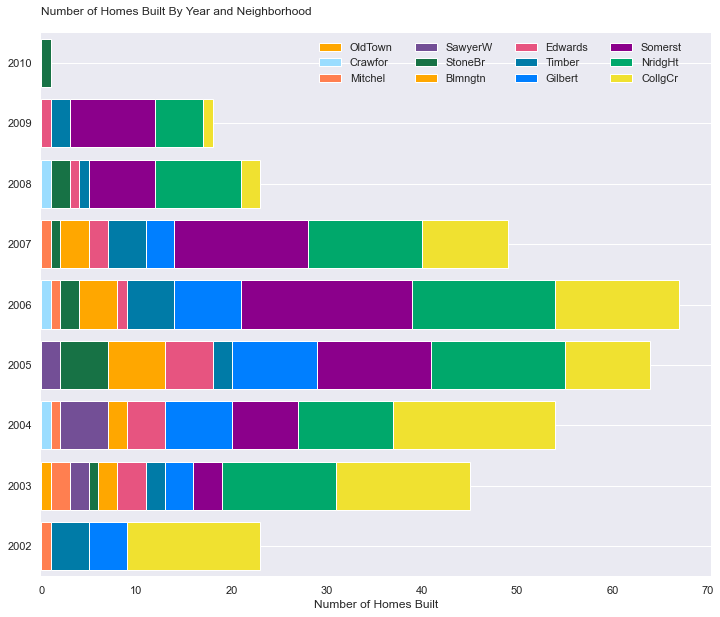

In [31]:
fields = ['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']
colors = ['#FFA700', # Chrome Yellow (light orange)
          '#9BDDFF', # Columbia Blue (light blue)
          '#FF7F50', # Coral
          '#734F96', # Dark Lavender
          '#177245', # Dark Spring Green
          '#FFA700', # Chrome Yellow (med orange)
          '#E75480', # Dark Pink
          '#007BA7', # Cerulean (dark teal)
          '#007FFF', # Azure (blue)
          '#8B008B', # Dark Magenta 
          '#00A86B', # Jade (soft green)
          '#F0E130', # Dandelion
          '#BD33A4', # Byzantine (magenta)
          '#003399'] # Dark Powder Blue (dark blue)
labels = ['OldTown','Crawfor','Mitchel',
      'SawyerW','StoneBr','Blmngtn','Edwards','Timber',
      'Gilbert','Somerst','NridgHt','CollgCr']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(x_new) * [0]
for idx, name in enumerate(fields):
    plt.barh(x_new.index, x_new[name], left = left, color=colors[idx])
    left = left + x_new[name]
# title, legend, labels
plt.title('Number of Homes Built By Year and Neighborhood\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.40, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Number of Homes Built')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

During this boom in houses building (between ~2003-2007), more houses were built in CollgCr, NridgHt, and Somerst ☝️ followed by Timber and Gilbert. 

Let's split the neighborhoods into quartiles based on median house price in the respective neighborhood

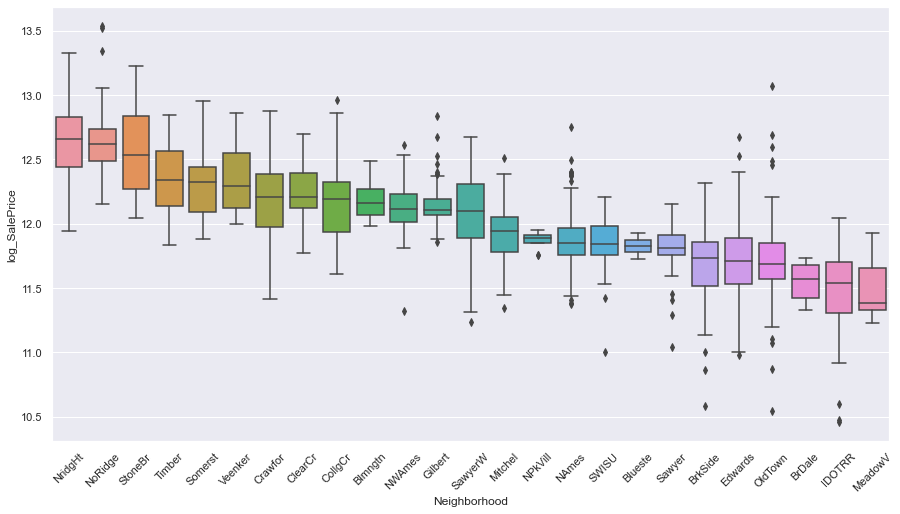

In [32]:
# ---------------------------------
# The Figure
# ---------------------------------
plt.figure(figsize = (15,8))   
    
# Ordering by median
temp = train0.groupby(['Neighborhood'])['log_SalePrice'].median().sort_values(ascending=False).reset_index();  

sns.boxplot(x=train0['Neighborhood'], 
        y=train0['log_SalePrice'],
        order = list(temp['Neighborhood']));     

plt.xticks(rotation=45);

In [33]:
# create lists of these four neighborhood groups

x = train0.groupby(['Neighborhood'])['log_SalePrice'].median().sort_values(ascending=False).reset_index()

affluent_neighborhoods = []
good_neighborhoods = []
average_neighborhoods = []
affordable_neighborhoods = []

prctile_75 = np.percentile(train0.groupby(['Neighborhood'])['log_SalePrice'].median().tolist(),75)
prctile_50 = np.percentile(train0.groupby(['Neighborhood'])['log_SalePrice'].median().tolist(),50)
prctile_25 = np.percentile(train0.groupby(['Neighborhood'])['log_SalePrice'].median().tolist(),25)

for neighb in x['Neighborhood']:
    
    med_temp = x.loc[np.where(x['Neighborhood']==neighb),'log_SalePrice'].tolist()
       
    if med_temp >= prctile_75:
        affluent_neighborhoods.append(neighb)
        
    elif med_temp >= prctile_50 and med_temp < prctile_75:
        good_neighborhoods.append(neighb)
        
    elif med_temp >= prctile_25 and med_temp < prctile_50:
        average_neighborhoods.append(neighb)
        
    else:
        affordable_neighborhoods.append(neighb)

In [34]:
affluent_neighborhoods 

['NridgHt', 'NoRidge', 'StoneBr', 'Timber', 'Somerst', 'Veenker', 'Crawfor']

In [35]:
good_neighborhoods

['ClearCr', 'CollgCr', 'Blmngtn', 'NWAmes', 'Gilbert', 'SawyerW']

In [36]:
average_neighborhoods

['Mitchel', 'NPkVill', 'NAmes', 'SWISU', 'Blueste', 'Sawyer']

In [37]:
affordable_neighborhoods

['BrkSide', 'Edwards', 'OldTown', 'BrDale', 'IDOTRR', 'MeadowV']

In [38]:
# Create new column!
train0['Neighborhood_Grp'] = 'Temp'

for neighb in affluent_neighborhoods:
    indx = np.where(train0['Neighborhood']== neighb)[0].tolist()
    train0.loc[indx,'Neighborhood_Grp'] = 'affluent'

for neighb in good_neighborhoods:
    indx = np.where(train0['Neighborhood']== neighb)[0].tolist()
    train0.loc[indx,'Neighborhood_Grp'] = 'good'
    
for neighb in average_neighborhoods:
    indx = np.where(train0['Neighborhood']== neighb)[0].tolist()
    train0.loc[indx,'Neighborhood_Grp'] = 'average'
    
for neighb in affordable_neighborhoods:
    indx = np.where(train0['Neighborhood']== neighb)[0].tolist()
    train0.loc[indx,'Neighborhood_Grp'] = 'affordable'

In [39]:
train0.loc[:,('Neighborhood','Neighborhood_Grp')]

,Neighborhood,Neighborhood_Grp
0,CollgCr,good
1,Veenker,affluent
2,CollgCr,good
3,Crawfor,affluent
4,NoRidge,affluent
...,...,...
1455,Gilbert,good
1456,NWAmes,good
1457,Crawfor,affluent
1458,NAmes,average


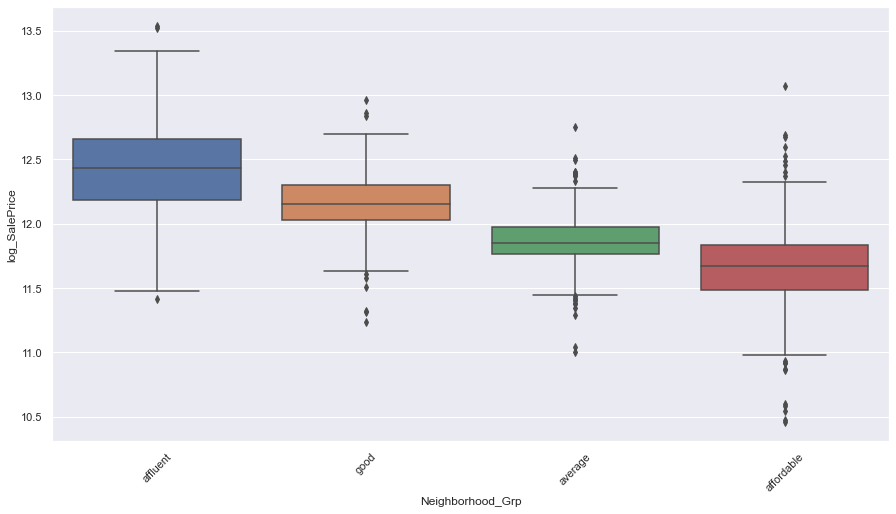

In [40]:
# ---------------------------------
# The Figure
# ---------------------------------
plt.figure(figsize = (15,8))   
    
# Ordering by median
temp = train0.groupby(['Neighborhood_Grp'])['log_SalePrice'].median().sort_values(ascending=False).reset_index()   

sns.boxplot(x=train0['Neighborhood_Grp'], 
    y=train0['log_SalePrice'],
    order = list(temp['Neighborhood_Grp']))      

plt.xticks(rotation=45);

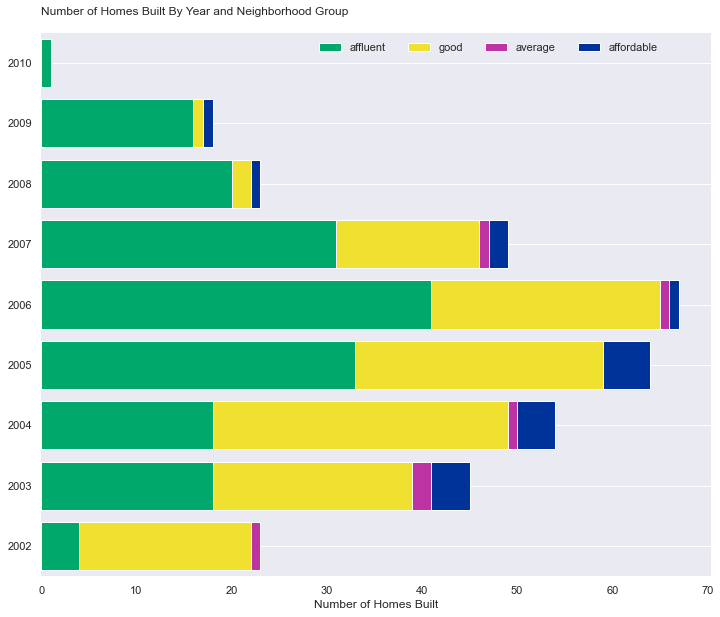

In [41]:
# Where were the homes built?
train_new = train0.loc[train0['YearBuilt'].isin(['2002',
                                     '2003','2004',
                                     '2005','2006',
                                     '2007','2008',
                                     '2009','2010'])]
train_new.groupby(['Neighborhood_Grp']).size().sort_values()

y = train_new.groupby(['YearBuilt','Neighborhood_Grp']).size()
y_new = y.unstack(level=-1, fill_value = 0)

# reorder the columns
y_new = y_new[['affluent','good','average','affordable']]

fields = ['affluent','good','average','affordable']
colors = ['#00A86B', # Jade (soft green)
          '#F0E130', # Dandelion
          '#BD33A4', # Byzantine (magenta)
          '#003399'] # Dark Powder Blue (dark blue)
labels = ['affluent','good','average','affordable']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(y_new) * [0]
for idx, name in enumerate(fields):
    plt.barh(y_new.index, y_new[name], left = left, color=colors[idx])
    left = left + y_new[name]
# title, legend, labels
plt.title('Number of Homes Built By Year and Neighborhood Group\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.40, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Number of Homes Built')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

# III. PREPROCESSING - Preparation for Model Training

## 3A. Imputation - Numerical Variables

In [42]:
# How many Missing Values?
num_train.isna().sum()

Id                      0
LotFrontage           259
LotArea                 0
OverallQual             0
OverallCond             0
YearRemodAdd            0
MasVnrArea              8
BsmtFinSF1              0
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            0
BsmtHalfBath            0
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt            81
GarageCars              0
GarageArea              0
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
SalePrice               0
AgeHome                 0
YrsSinceRemodel         0
Num_Bathrms_AbvGrd      0
Num_Bathrms_Bsmt        0
log_SalePric

In [43]:
num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

## * LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property

In [44]:
train0['LotFrontage'].isnull().sum()

259

In [45]:
# Checking the LotConfig values
train0[train0['LotFrontage'].isnull()]['LotConfig'].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

There are no obvious discrepancies observed with these missing data. Because I believe these homes do not have street connected to the property. Therefore I will replace the missing data with zero. 

In [46]:
# train0.groupby('Neighborhood')['LotFrontage'].median()

In [47]:
# ACTION: Let's change the missing LotFrontage rows
     # to be the median LotFrontage of its neighborhood

for i in list(set(train0['Neighborhood'])):
    df_neighbh = train0[train0['Neighborhood']== i] 
    
    windices = np.where((train0['LotFrontage'].isnull()) 
         & (train0['Neighborhood']==i))
    
    # print(i,df_neighbh['LotFrontage'].median(),windices)   
    
    train0.loc[(windices[0]),
               'LotFrontage'] = df_neighbh['LotFrontage'].median()

In [48]:
# Checking if the change was made
train0['LotFrontage'].isnull().sum()

0

## * MasVnrArea

(Google) A masonry veneer is an outer layer of brick or stone on a building. Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

MasVnrArea (Continuous): Masonry veneer area in square feet

MasVnrType (Nominal): Masonry veneer type

In [49]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [50]:
# How many missing again?
train0['MasVnrArea'].isnull().sum()

8

In [51]:
# For these 'MasVnrArea' = nan, what'MasVnrType's do we have?
train0[train0['MasVnrArea'].isnull()]['MasVnrType'].unique()

array([nan], dtype=object)

In [52]:
# ACTION: Let's change the MasVnrType to 'None', for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrType']='None'

# ACTION: Let's change the MasVnrArea to 0.0, for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrArea']= 0.0

In [53]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [54]:
print('MasVnrArea = nan are gone')
train0['MasVnrArea'].isnull().sum()

MasVnrArea = nan are gone


0

#### Another Discrepancy
- Here you see that some of the 'MasVnrType' == 'None' rows, have 'MasVnrArea' that are not equal to 0.0

In [55]:
print('Another issue... This does NOT make sense:')
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

Another issue... This does NOT make sense:


624    288.00000
773      1.00000
1230     1.00000
1300   344.00000
1334   312.00000
Name: MasVnrArea, dtype: float64

In [56]:
np.where([(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)])

(array([0, 0, 0, 0, 0]), array([ 624,  773, 1230, 1300, 1334]))

### Zeros

In [57]:
# Count number of zeros in all columns of Dataframe
for column_name in num_train.columns:
    column = num_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count != 0: 
        print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  MasVnrArea  is :  861
Count of zeros in column  BsmtFinSF1  is :  467
Count of zeros in column  BsmtFinSF2  is :  1293
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  TotalBsmtSF  is :  37
Count of zeros in column  2ndFlrSF  is :  829
Count of zeros in column  LowQualFinSF  is :  1434
Count of zeros in column  BsmtFullBath  is :  856
Count of zeros in column  BsmtHalfBath  is :  1378
Count of zeros in column  FullBath  is :  9
Count of zeros in column  HalfBath  is :  913
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  KitchenAbvGr  is :  1
Count of zeros in column  Fireplaces  is :  690
Count of zeros in column  GarageCars  is :  81
Count of zeros in column  GarageArea  is :  81
Count of zeros in column  WoodDeckSF  is :  761
Count of zeros in column  OpenPorchSF  is :  656
Count of zeros in column  EnclosedPorch  is :  1252
Count of zeros in column  3SsnPorch  is :  1436
Count of zeros in column  ScreenPorch

Looking into "BedroomAbvGr" = 0

In [58]:
print('Hmm. These do not make sense, no bedrooms above ground?')
print('TotRmsAbvGrd values range from 3-6.')
print('Row 1163: SaleCondition = Alloca, maybe only a Garage?')
np.where(train0['BedroomAbvGr']==0.0)

Hmm. These do not make sense, no bedrooms above ground?
TotRmsAbvGrd values range from 3-6.
Row 1163: SaleCondition = Alloca, maybe only a Garage?


(array([  53,  189,  634, 1163, 1213, 1270]),)

In [59]:
train0.loc[[53,  189,  634, 1163, 1213, 1270],:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp
53,54,20,RL,68.00000,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.00000,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,"1,981.00000",Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,25,19,0.50000,2,12.86100,affluent
189,190,120,RL,41.00000,4923,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2002,Gable,CompShg,CemntBd,CmentBd,None,0.00000,Gd,TA,PConc,Ex,TA,Av,GLQ,1153,Unf,0,440,1593,GasA,Ex,Y,SBrkr,1593,0,0,1593,1,0,1,1,0,1,Ex,5,Typ,1,Gd,Attchd,"2,001.00000",Fin,2,682,TA,TA,Y,0,120,0,0,224,0,NaN,NaN,NaN,0,8,2008,WD,Normal,286000,7,6,1.50000,1,12.56375,affluent
634,635,90,RL,64.00000,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.00000,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,"1,980.00000",Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000,30,30,0.00000,2,11.87757,affordable
1163,1164,90,RL,60.00000,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.00000,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,TA,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,NaN,CarPort,"1,969.00000",Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959,39,39,1.00000,2,11.59873,average
1213,1214,80,RL,71.00000,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NaN,Attchd,"1,965.00000",Unf,1,364,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000,41,5,0.00000,2,11.88449,average
1270,1271,40,RL,80.00000,23595,Pave,NaN,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.00000,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,"1,979.00000",Fin,2,586,TA,TA,Y,268,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000,31,31,0.50000,2,12.46844,good


Looking into "FullBath" = 0

In [60]:
print('Okay, the Full Baths are in the basement.')
print('However, Row 597 has no full baths at all?')
np.where(train0['FullBath']==0.0)

Okay, the Full Baths are in the basement.
However, Row 597 has no full baths at all?


(array([  53,  188,  375,  597,  634,  916, 1163, 1213, 1270]),)

In [61]:
train0.loc[[53,  188,  375,  597,  634,  916, 1163, 1213, 1270],:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp
53,54,20,RL,68.00000,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.00000,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,"1,981.00000",Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,25,19,0.50000,2,12.86100,affluent
188,189,90,RL,64.00000,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.00000,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,"1,979.00000",Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337,30,30,1.00000,2,11.94039,good
375,376,30,RL,65.50000,10020,Pave,NaN,IR1,Low,AllPub,Inside,Sev,Edwards,Norm,Norm,1Fam,1Story,1,1,1922,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.00000,Fa,Fa,BrkTil,Fa,Po,Gd,BLQ,350,Unf,0,333,683,GasA,Gd,N,FuseA,904,0,0,904,1,0,0,1,1,1,Fa,4,Maj1,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,61000,87,59,0.50000,1,11.01863,affordable
597,598,120,RL,53.00000,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.00000,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,"2,006.00000",Fin,3,648,TA,TA,Y,120,16,0,0,0,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201,1,0,1.00000,2,12.17665,good
634,635,90,RL,64.00000,6979,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Duplex,SFoyer,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.00000,TA,TA,CBlock,TA,TA,No,GLQ,1056,Unf,0,0,1056,GasA,Gd,Y,SBrkr,1056,0,0,1056,2,0,0,0,0,2,TA,4,Typ,0,NaN,Detchd,"1,980.00000",Unf,2,576,TA,TA,Y,264,56,0,0,0,0,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000,30,30,0.00000,2,11.87757,affordable
916,917,20,C (all),50.00000,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.00000,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,"1,958.00000",Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311,57,56,0.00000,1,10.47195,affordable
1163,1164,90,RL,60.00000,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,4,4,1969,1969,Gable,CompShg,Plywood,Plywood,None,0.00000,TA,TA,CBlock,Gd,TA,Av,GLQ,1198,Unf,0,0,1198,GasA,TA,Y,SBrkr,1258,0,0,1258,2,0,0,2,0,2,TA,6,Typ,0,NaN,CarPort,"1,969.00000",Unf,2,400,Fa,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959,39,39,1.00000,2,11.59873,average
1213,1214,80,RL,71.00000,10246,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,None,0.00000,TA,Gd,CBlock,TA,Gd,Av,GLQ,648,Unf,0,0,648,GasA,Ex,Y,SBrkr,960,0,0,960,1,1,0,0,0,1,TA,3,Typ,0,NaN,Attchd,"1,965.00000",Unf,1,364,TA,TA,Y,88,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000,41,5,0.00000,2,11.88449,average
1270,1271,40,RL,80.00000,23595,Pave,NaN,Reg,

Looking into "KitchenAbvGr" = 0

In [62]:
print('Row 954: No Kitchen counted. However, there is a KitchenQual.')
np.where(train0['KitchenAbvGr']==0.0)

Row 954: No Kitchen counted. However, there is a KitchenQual.


(array([954]),)

In [63]:
train0.loc[[954],:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp
954,955,90,RL,35.00000,9400,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,6,5,1975,1975,Flat,Tar&Grv,WdShing,Plywood,BrkFace,250.00000,TA,TA,CBlock,Gd,Gd,Gd,GLQ,945,Unf,0,0,945,GasA,TA,Y,SBrkr,980,0,0,980,0,2,2,0,4,0,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500,31,31,2.00000,2,11.75587,affordable


## 3B. Imputation - Categorica Variables

In [64]:
# How many Missing Values?
cat_train.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
MoSold              0
YrSold              0
SaleType  

In [65]:
cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [66]:
# Checking the values available for each categorical variable
for cvar in cat_miss:
    print(cvar, train0[cvar].unique())

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Alley

In [67]:
print(train0['Alley'].unique())

[nan 'Grvl' 'Pave']


In [68]:
train0.loc[(train0['Alley'].isna()),'Alley']= 'NoAlley'

In [69]:
print(train0['Alley'].unique())

['NoAlley' 'Grvl' 'Pave']


### MasVnrType

I examined this variable above, when looking at the numerical variable MasVnrArea. See above comments. 

### Basement Variables 

Looking closer at the rows with missing data, the data_description.txt file indicates that these houses have "No Basement". If any of these categorical variables (listed here) have NA. 
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

  - NA	➡➡➡  No Basement

In [70]:
# Grabbing the indices when each bsmt variabes have missing values
# in the data_description.txt, na should mean "No Basement"
bsmt_1 = np.where(train0['BsmtQual'].isna())
bsmt_2 = np.where(train0['BsmtCond'].isna())
bsmt_3 = np.where(train0['BsmtExposure'].isna())
bsmt_4 = np.where(train0['BsmtFinType1'].isna())
bsmt_5 = np.where(train0['BsmtFinType2'].isna())

In [71]:
all_NoBsmt_rows = np.concatenate((bsmt_1, 
                                  bsmt_2, 
                                  bsmt_3, 
                                  bsmt_4,
                                  bsmt_5), axis=None)

In [72]:
No_Bsmt_rows = np.unique(all_NoBsmt_rows)
print('These particular rows should have no basements, lets verify.')
print(No_Bsmt_rows)

These particular rows should have no basements, lets verify.
[  17   39   90  102  156  182  259  332  342  362  371  392  520  532
  533  553  646  705  736  749  778  868  894  897  948  984 1000 1011
 1035 1045 1048 1049 1090 1179 1216 1218 1232 1321 1412]


In [73]:
# lets look at these basement categorical variables 
bsmt_cvars = ['BsmtQual',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'BsmtFinType2']

print('For these indices, these values exist:')
print('Expecting nan values:')
print('\n')

for bcvar in bsmt_cvars:
    
    print(bcvar,
          No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows,bcvar].notna())],
          train0.loc[No_Bsmt_rows,bcvar].unique())

For these indices, these values exist:
Expecting nan values:


BsmtQual [332 948] [nan 'Gd']
BsmtCond [332 948] [nan 'TA']
BsmtExposure [332] [nan 'No']
BsmtFinType1 [332 948] [nan 'GLQ' 'Unf']
BsmtFinType2 [948] [nan 'Unf']


BsmtFinSF1 indices with samples > 0 [332]
BsmtFinSF2 indices with samples > 0 [332]
BsmtUnfSF indices with samples > 0 [332 948]
TotalBsmtSF indices with samples > 0 [332 948]
BsmtFullBath indices with samples > 0 [332]
BsmtHalfBath indices with samples > 0 []


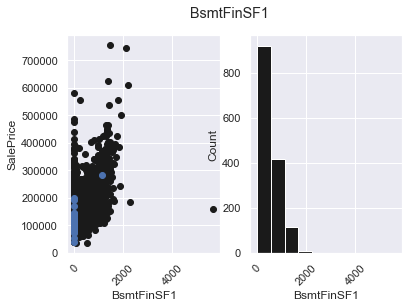

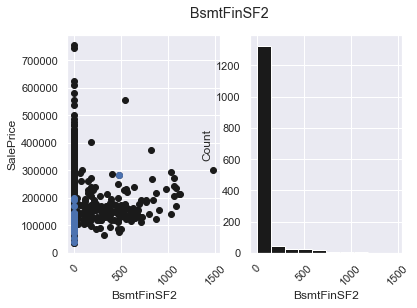

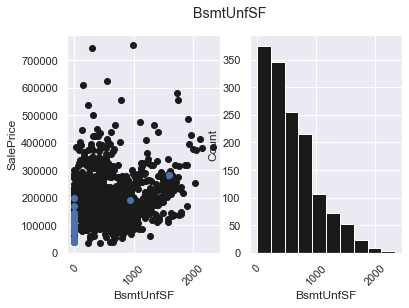

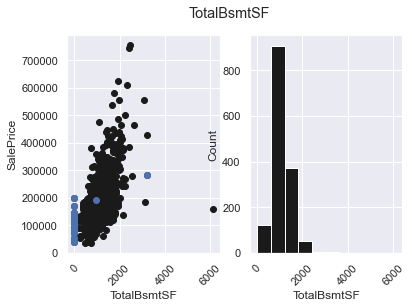

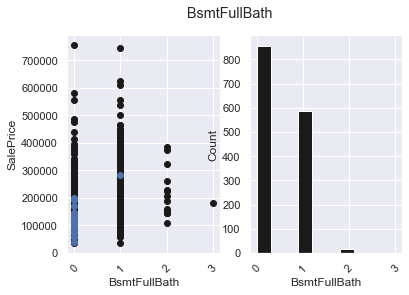

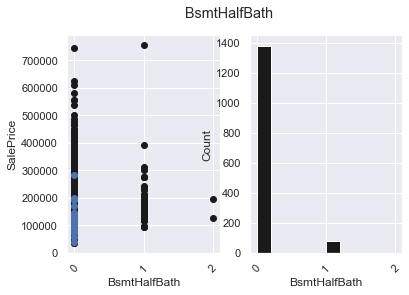

In [74]:
# lets look at these basement numerical variables 
bsmt_nvars = ['BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']     

for nvar in bsmt_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='k')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='k')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no basement" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Bsmt_rows,nvar],train0.loc[No_Bsmt_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [75]:
print('This row does not make sense. BsmtFinType2 = NaN,')
print('BUT, there is a value for BsmtFinSF2 = 479.')
print('Lets consider dropping this row,')
print('Because BsmtFinType2 = ???? who knows\n')

print(train0.loc[332,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType2',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

This row does not make sense. BsmtFinType2 = NaN,
BUT, there is a value for BsmtFinSF2 = 479.
Lets consider dropping this row,
Because BsmtFinType2 = ???? who knows

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinType2     NaN
BsmtFinSF1      1124
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
BsmtFullBath       1
BsmtHalfBath       0
Name: 332, dtype: object


In [76]:
print('Okay, this row is OK. BsmtExposure = NaN.')
print('But clearly there is a basement (unfinished).')
print('ACTION: Changing BsmtExposure = No\n')
print(train0.loc[948,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

Okay, this row is OK. BsmtExposure = NaN.
But clearly there is a basement (unfinished).
ACTION: Changing BsmtExposure = No

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF       936
TotalBsmtSF     936
BsmtFullBath      0
BsmtHalfBath      0
Name: 948, dtype: object


In [77]:
print(train0.loc[948,'BsmtExposure'])
train0.loc[948,'BsmtExposure']='No'
print(train0.loc[948,'BsmtExposure'])

nan
No


Okay change these rows to 'NoBsmt'

In [78]:
bsmt_cvars

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [79]:
print(np.where(train0['BsmtQual'].isna()))
train0.loc[(train0['BsmtQual'].isna()),'BsmtQual']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtQual'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [80]:
print(np.where(train0['BsmtCond'].isna()))
train0.loc[(train0['BsmtCond'].isna()),'BsmtCond']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtCond'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [81]:
print(np.where(train0['BsmtExposure'].isna()))
train0.loc[(train0['BsmtExposure'].isna()),'BsmtExposure']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtExposure'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [82]:
print(np.where(train0['BsmtFinType1'].isna()))
train0.loc[(train0['BsmtFinType1'].isna()),'BsmtFinType1']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType1'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [83]:
# Remove row 332 from this index list
# bsmt_5 = np.where(train0['BsmtFinType2'].isna())
x = bsmt_5[0].tolist()
x.remove(332)

print(x)
train0.loc[x,'BsmtFinType2']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType2'].isna()))

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
Missing values? : (array([332]),)


In [84]:
# Creating a new Bsmt variable
train0['hasBsmt'] = 'Basement'
train0.loc[No_Bsmt_rows,'hasBsmt'] = 'NoBsmt'

### Garage Variables

In [85]:
# Grabbing the indices when each garage variabes have missing values
garg_1 = np.where(train0['GarageType'].isna())
garg_2 = np.where(train0['GarageFinish'].isna())
garg_3 = np.where(train0['GarageQual'].isna())
garg_4 = np.where(train0['GarageCond'].isna())

In [86]:
all_NoGarg_rows = np.concatenate((garg_1, garg_2, garg_3, garg_4), axis=None)
# print(all_NoGarg_rows)

In [87]:
No_Garg_rows = np.unique(all_NoGarg_rows)
print('These particular rows should have no garages, lets verify.')
print(No_Garg_rows)
print(len(No_Garg_rows))

These particular rows should have no garages, lets verify.
[  39   48   78   88   89   99  108  125  127  140  148  155  163  165
  198  210  241  250  287  291  307  375  386  393  431  434  441  464
  495  520  528  533  535  562  582  613  614  620  635  636  638  649
  705  710  738  750  784  826  843  921  942  954  960  968  970  976
 1009 1011 1030 1038 1096 1123 1131 1137 1143 1173 1179 1218 1219 1234
 1257 1283 1323 1325 1326 1337 1349 1407 1449 1450 1453]
81


In [88]:
# lets look at these garage categorical variables 
garg_cvars = ['GarageType',
             'GarageFinish', 
             'GarageQual', 
             'GarageCond']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no garage" rows):')
print('\n')

for gcvar in garg_cvars:
    
    print(gcvar,
          No_Garg_rows[np.where(train0.loc[No_Garg_rows,gcvar].notna())],
          train0.loc[No_Garg_rows,gcvar].unique())
    
print('\n')

For each variable, these indices have these values for these particular rows:
Expecting nan values (these are the "no garage" rows):


GarageType [] [nan]
GarageFinish [] [nan]
GarageQual [] [nan]
GarageCond [] [nan]




GarageCars indices with samples > 0 []
GarageArea indices with samples > 0 []
GarageYrBlt indices with samples > 0 []


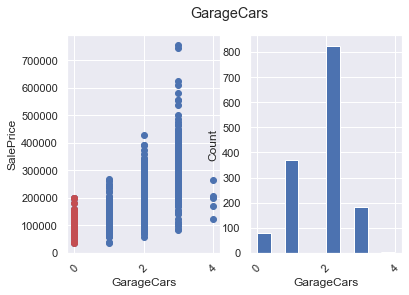

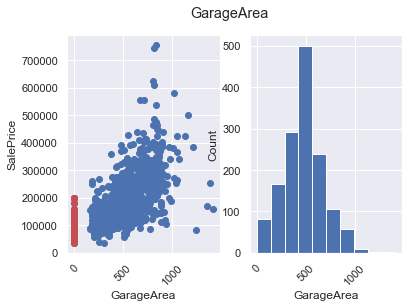

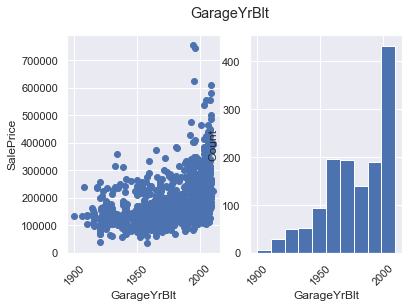

In [89]:
# lets look at these garage numerical variables 
garg_nvars = ['GarageCars', 
             'GarageArea',
             'GarageYrBlt']     

for nvar in garg_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no garage" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Garg_rows,nvar],train0.loc[No_Garg_rows,'SalePrice'],
                  color='r')

    print(nvar, 'indices with samples > 0', No_Garg_rows[np.where(train0.loc[No_Garg_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [90]:
print(np.where(train0['GarageType'].isna()))
train0.loc[(train0['GarageType'].isna()),'GarageType']='None'
print(np.where(train0['GarageType'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [91]:
print(np.where(train0['GarageFinish'].isna()))
train0.loc[(train0['GarageFinish'].isna()),'GarageFinish']='None'
print(np.where(train0['GarageFinish'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [92]:
print(np.where(train0['GarageQual'].isna()))
train0.loc[(train0['GarageQual'].isna()),'GarageQual']='None'
print(np.where(train0['GarageQual'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [93]:
print(np.where(train0['GarageCond'].isna()))
train0.loc[(train0['GarageCond'].isna()),'GarageCond']='None'
print(np.where(train0['GarageCond'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [94]:
print(np.where(train0['GarageYrBlt'].isna())) # Leaving these as NaNs

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)


In [95]:
# Creating a new garage variable
train0['hasGarage'] = 'Garage'
train0.loc[No_Garg_rows,'hasGarage'] = 'NoGarage'

### Electrical

In [96]:
print(train0['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [97]:
np.where(train0['Electrical'].isna())

(array([1379]),)

### FireplaceQu

In [98]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [99]:
print('Firepaces unique values for the NANs: ', 
      train0.loc[train0['FireplaceQu'].isna(),'Fireplaces'].unique())

Firepaces unique values for the NANs:  [0]


In [100]:
train0.loc[(train0['FireplaceQu'].isna()),
           'FireplaceQu']= 'NoFirePlace'

In [101]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  ['NoFirePlace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


### Fence

In [102]:
print('Fence: ', train0['Fence'].unique())

Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [103]:
train0.loc[(train0['Fence'].isna()),'Fence']= 'NoFence'

In [104]:
print('Fence: ', train0['Fence'].unique())

Fence:  ['NoFence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### MiscFeature

In [105]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [106]:
train0.loc[(train0['MiscFeature'].isna()),'MiscFeature']= 'None'

In [107]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  ['None' 'Shed' 'Gar2' 'Othr' 'TenC']


### Pool Variables

In [108]:
print('PoolQC: ', train0['PoolQC'].unique())
train0.loc[(train0['PoolQC'].isna()),'PoolQC']= 'NoPool'
print('PoolQC: ', train0['PoolQC'].unique())

PoolQC:  [nan 'Ex' 'Fa' 'Gd']
PoolQC:  ['NoPool' 'Ex' 'Fa' 'Gd']


In [109]:
print('Okay all the PoolArea = 0 rows, are PoolQC = NoPool')
train0.loc[train0['PoolArea']==0,'PoolQC'].unique()

Okay all the PoolArea = 0 rows, are PoolQC = NoPool


array(['NoPool'], dtype=object)

In [110]:
print('Okay all the PoolQC = NoPool rows, are Area = 0')
train0.loc[train0['PoolQC']=='NoPool','PoolArea'].unique()

Okay all the PoolQC = NoPool rows, are Area = 0


array([0])

# Checking The Missing

In [111]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)

# How many Missing Values?
num_train.isna().sum()

num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['GarageYrBlt']

In [112]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)

# How many Missing Values?
cat_train.isna().sum()

cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['BsmtFinType2', 'Electrical']

# Remove some rows and columns

In [113]:
train0.shape[0]

1460

In [114]:
# Rows where there are outliers, data discrepancies, 
#    or I have some uncertainty in the values.
list1 = np.where(train0['BedroomAbvGr']==0)[0].tolist() 
list2 = np.where([(train0['FullBath']==0) & (train0['BsmtFullBath']==0)])[1].tolist()
list3 = np.where(abs(stats.zscore(train0['GrLivArea'])) > 4.5)[0].tolist()
list4 = np.where([(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)])[1].tolist()
list5 = np.where(train0['KitchenAbvGr']==0.0)[0].tolist()
list6 = np.where([(train0['BsmtFinType2'].isnull()) & (train0['BsmtFinSF2']!=0)])[1].tolist()
list7 = np.where(train0['Electrical'].isna())[0].tolist()

list_toRemove = list1 + list2 + list3 + list4 + list5 + list6 + list7
print(len(list_toRemove),' rows:')
print(list_toRemove)
list_toRemove = np.unique(list_toRemove)
print(len(list_toRemove),' unique rows:')
print(list_toRemove)

19  rows:
[53, 189, 634, 1163, 1213, 1270, 597, 523, 691, 1182, 1298, 624, 773, 1230, 1300, 1334, 954, 332, 1379]
19  unique rows:
[  53  189  332  523  597  624  634  691  773  954 1163 1182 1213 1230
 1270 1298 1300 1334 1379]


In [115]:
list4

[624, 773, 1230, 1300, 1334]

In [116]:
train = train0.drop(list_toRemove, axis=0).reset_index()

In [117]:
train.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,Num_Bathrms_AbvGrd,Num_Bathrms_Bsmt,log_SalePrice,Neighborhood_Grp,hasBsmt,hasGarage
0,0,1,60,RL,65.00000,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,"2,003.00000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,2.50000,1,12.24769,good,Basement,Garage
1,1,2,20,RL,80.00000,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,2.00000,1,12.10901,affluent,Basement,Garage
2,2,3,60,RL,68.00000,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,2.50000,1,12.31717,good,Basement,Garage
3,3,4,70,RL,60.00000,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,1.00000,1,11.84940,affluent,Basement,Garage
4,4,5,60,RL,84.00000,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,2.50000,1,12.42922,affluent,Basement,Garage


In [118]:
# Remove these, accounted for them with other AgeHome, YrsSinceRemodel, AgeGarage
train = train.drop('YearBuilt', axis=1)
train = train.drop('YearRemodAdd', axis=1)
train = train.drop('GarageYrBlt', axis=1)

train = train.drop('FullBath', axis=1)
train = train.drop('HalfBath', axis=1)
train = train.drop('BsmtFullBath', axis=1)
train = train.drop('BsmtHalfBath', axis=1)

In [119]:
train.shape[0]

1441

# Save Train Dataset

In [120]:
train.to_csv('./Data/train_clean.csv')

# Replotting some Visualizations below

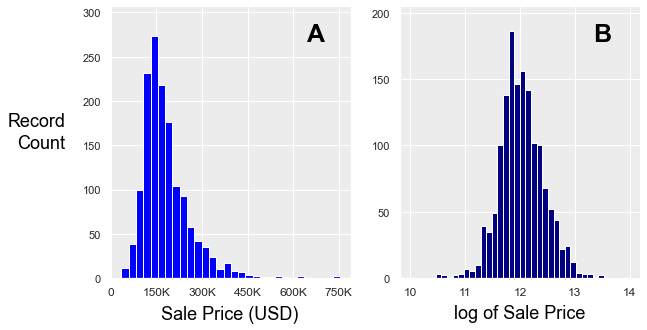

In [121]:
# Figure 2 
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train0['SalePrice'], color='blue',bins = 30)

ax1.set_ylabel(' ', fontsize=16, color = 'black')
ax1.set_xlabel(' ', fontsize=20, color = 'black')
x_ticks_labels = ['0','150K','300K','450K','600K','750K']
ax1.set_xticks([0,150000,300000,450000,600000,750000]);
ax1.set_xticklabels(x_ticks_labels, fontsize=12)
ax1.set_ylim(0,307)
ax1.set_yticks([0,50,100,150,200,250,300]);
ax1.tick_params(axis='x', which='major', labelsize=12, color='black')
ax1.text(-150000,172,'Record',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
ax1.text(-150000,147,'Count',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
ax1.text(390100,-46,'Sale Price (USD)',ha = 'center', # Sale Price (USD)
         fontsize=18,color='black',
         rotation=0)
ax1.text(675000,268,'A',ha = 'center',
         fontsize=25,color='black', weight = 'bold',
         rotation=0)
ax2.hist(train0['log_SalePrice'], color='navy',bins = 30)

ax2.set_ylabel(' ', fontsize=16, color = 'black')
ax2.set_xlabel(' ', fontsize=20, color = 'black')
ax2.set_ylim(0,205)
ax2.set_yticks([0,50,100,150,200]);
ax2.tick_params(axis='x', which='major', labelsize=12, color='black')
ax2.text(12,-29.9,'log of Sale Price',ha = 'center', # log of Sale Price
         fontsize=18,color='black',
         rotation=0)
ax2.text(13.50,178.5,'B',ha = 'center',
         fontsize=25,color='black', weight = 'bold',
         rotation=0)
ax2.set_xlim(9.8,14.20)

ax1.set_facecolor('#ECECEC')
ax2.set_facecolor('#ECECEC')

fig.set_figheight(5)
fig.set_figwidth(9.5)

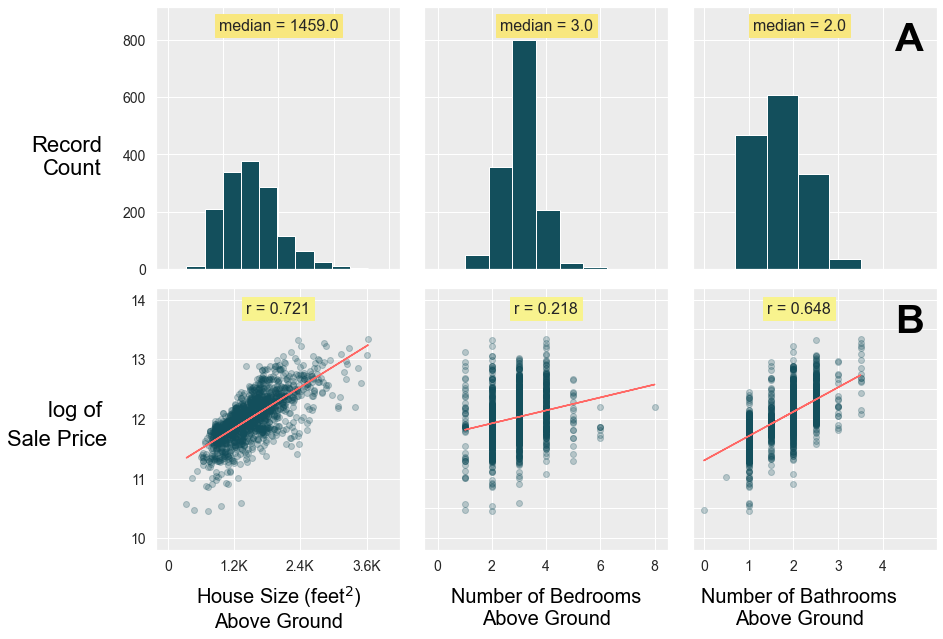

In [122]:
# Figure 3
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

##################################
fig, axs = plt.subplots(2,3, gridspec_kw={'width_ratios': [1, 1, 1],
                                         'height_ratios': [0.5,0.5]}) 
figcolor = '#134f5c'
fig.set_figheight(10)
fig.set_figwidth(14)

axs[0,0].hist(train['GrLivArea'], color=figcolor)
axs[0,0].set_ylabel(' ', fontsize=14, color = 'black')
axs[0,0].set_xlim(-225,4200)
axs[0,0].set_ylim(0,915)
axs[0,0].tick_params(axis='y',labelsize=14)
axs[0,0].text(-1200,430,'Record',ha = 'right',va='center',
         fontsize=22,color='black',
         rotation=0)
axs[0,0].text(-1200,350,'Count',ha = 'right',va='center',
         fontsize=22,color='black',
         rotation=0)
axs[0,0].set_yticks([0,200,400,600,800])
axs[0,0].set_xticklabels([])
axs[0,0].text(2000,849,('median = '+ str(round(np.median(train['GrLivArea']),0))), 
              fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8e77f')
axs[0,0].set_facecolor('#ECECEC')

axs[1,0].scatter(train['GrLivArea'],train['log_SalePrice'],color=figcolor,alpha=0.25)
axs[1,0].set_xlabel(' ', fontsize=14, color = 'black')
axs[1,0].set_xlim(-225,4200)
axs[1,0].set_ylim(9.8,14.20)
axs[1,0].tick_params(axis='both',labelsize=14)
axs[1,0].set_ylim(9.8,14.20)
axs[1,0].text(-1200,12.15,'log of',ha = 'right',va='center',
         fontsize=22,color='black',
         rotation=0)
axs[1,0].text(-1100,11.65,'Sale Price',ha = 'right',va='center',
         fontsize=22,color='black',
         rotation=0)
axs[1,0].set_yticks([10,11,12,13,14])
axs[1,0].text(2000,8.50,'House Size (feet$^2$)\nAbove Ground',ha = 'center', 
         fontsize=20,color='black',
         rotation=0)
axs[1,0].tick_params(axis='x',labelsize=14)
axs[1,0].set_xticks([0,1200,2400,3600])
axs[1,0].set_xticklabels(['0', '1.2K','2.4K','3.6K'])
r2 = ma.corrcoef(ma.masked_invalid(train['GrLivArea']), 
                ma.masked_invalid(train['log_SalePrice']))
axs[1,0].text(2000,13.85,('r = '+ str(round(r2[0,1],3))), fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8f38e')
x = train['GrLivArea']
y = train['log_SalePrice']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axs[1,0].plot(x, m*x + c, '#FF6865')
axs[1,0].set_facecolor('#ECECEC')

axs[0,1].hist(train['BedroomAbvGr'], color=figcolor, bins = 8)
axs[0,1].set_ylabel(' ', fontsize=14, color = 'black')
axs[0,1].set_xlim(-0.5,8.5)
axs[0,1].set_ylim(0,915)
axs[0,1].set_yticklabels([])
axs[0,1].set_xticklabels([])
axs[0,1].text(4,849,('median = '+ str(round(np.median(train['BedroomAbvGr']),0))), 
              fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8e77f')
axs[0,1].set_facecolor('#ECECEC')

axs[1,1].scatter(train['BedroomAbvGr'],train['log_SalePrice'],color=figcolor,alpha=0.25)
axs[1,1].set_xlabel(' ', fontsize=14, color = 'black')
axs[1,1].set_xlim(-0.5,8.5)
axs[1,1].set_ylim(9.8,14.20)
axs[1,1].set_yticklabels([])
axs[1,1].text(4,8.55,'Number of Bedrooms\nAbove Ground',ha = 'center', 
         fontsize=20,color='black',
         rotation=0)
axs[1,1].tick_params(axis='x',labelsize=14)
axs[1,1].set_xticks([0,2,4,6,8])
r3 = ma.corrcoef(ma.masked_invalid(train['BedroomAbvGr']), 
                ma.masked_invalid(train['log_SalePrice']))
axs[1,1].text(4,13.85,('r = '+ str(round(r3[0,1],3))), fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8f38e')
x = train['BedroomAbvGr']
y = train['log_SalePrice']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axs[1,1].plot(x, m*x + c, '#FF6865')
axs[1,1].set_facecolor('#ECECEC')

axs[0,2].hist(train['Num_Bathrms_AbvGrd'], color=figcolor,bins = 5)
axs[0,2].set_ylabel(' ', fontsize=14, color = 'black')
axs[0,2].set_xlim(-0.25,5.2)
axs[0,2].set_ylim(0,915)
axs[0,2].set_yticklabels([])
axs[0,2].set_xticklabels([])
axs[0,2].set_xticks([0,1,2,3,4])
axs[0,2].text(2.125,849,('median = '+ str(round(np.median(train['Num_Bathrms_AbvGrd']),0))), 
              fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8e77f')
axs[0,2].set_facecolor('#ECECEC')
axs[0,2].text(4.6,764,'A',ha = 'center',
         fontsize=40,color='black', weight='bold',
         rotation=0) 

axs[1,2].scatter(train['Num_Bathrms_AbvGrd'],train['log_SalePrice'],color=figcolor,alpha=0.25)
axs[1,2].set_xlabel(' ', fontsize=14, color = 'black')
axs[1,2].set_xlim(-0.25,5.2)
axs[1,2].set_ylim(9.8,14.20)
axs[1,2].set_yticklabels([])
axs[1,2].text(2.125,8.55,'Number of Bathrooms\nAbove Ground',ha = 'center', 
         fontsize=20,color='black',
         rotation=0)
axs[1,2].tick_params(axis='x',labelsize=14)
axs[1,2].set_xticks([0,1,2,3,4])
r4 = ma.corrcoef(ma.masked_invalid(train['Num_Bathrms_AbvGrd']), 
                ma.masked_invalid(train['log_SalePrice']))
axs[1,2].text(2.125,13.85,('r = '+ str(round(r4[0,1],3))), fontsize=16, 
              ha='center',va='center',
              backgroundcolor='#f8f38e')
x = train['Num_Bathrms_AbvGrd']
y = train['log_SalePrice']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axs[1,2].plot(x, m*x + c, '#FF6865')
axs[1,2].set_facecolor('#ECECEC')
axs[1,2].text(4.6,13.45,'B',ha = 'center',
         fontsize=40,color='black', weight='bold',
         rotation=0) 

fig.subplots_adjust(hspace=0.07,wspace=0.10)

In [123]:
#list(train.groupby(['Exterior1st'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()['Exterior1st'])

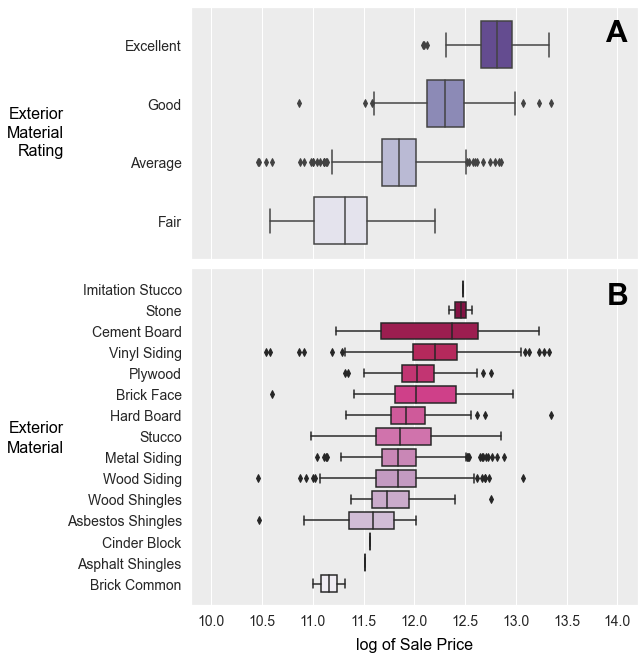

In [124]:
# Figure 4
fig, axes = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1],
                                            'height_ratios': [0.75, 1]})
    
# Ordering by median
temp = train.groupby(['ExterQual'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels0 = ['Fair', 'Average', 'Good','Excellent']

g = sns.boxplot(ax=axes[0],
    y=train['ExterQual'], 
    x=train['log_SalePrice'],
    order = list(temp['ExterQual']),palette="Purples")      
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 12)
axes[0].set_xlim(9.8,14.20)
axes[0].set_yticklabels([])

axes[0].set_ylim(-0.65,3.65)
axes[0].set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)

# Exterior Material Quality Rating
axes[0].text(8.55,1.75,'Exterior',ha = 'right', #Exterior Material Quality Rating
         fontsize=16,color='black',
         rotation=0)
axes[0].text(8.55,1.43,'Material',ha = 'right', #Exterior Material Quality Rating
         fontsize=16,color='black',
         rotation=0)
axes[0].text(8.55,1.11,'Rating',ha = 'right', #Exterior Material Quality Rating
         fontsize=16,color='black',
         rotation=0)
axes[0].text(14,3.05,'A',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)   
axes[0].set_xticklabels([])
axes[0].set_facecolor('#ECECEC')

##################################
# Ordering by median
temp = train.groupby(['Exterior1st'])['log_SalePrice'].median().sort_values(ascending=True).reset_index() 

y_ticks_labels1 = ['Brick Common',
 'Asphalt Shingles',
 'Cinder Block',
 'Asbestos Shingles',
 'Wood Shingles',
 'Wood Siding',
 'Metal Siding',
 'Stucco',
 'Hard Board',
 'Brick Face',
 'Plywood',
 'Vinyl Siding',
 'Cement Board',
 'Stone',
 'Imitation Stucco']

g = sns.boxplot(ax=axes[1], 
    y=train['Exterior1st'], 
    x=train['log_SalePrice'],
    order = list(temp['Exterior1st']), palette="PuRd")      
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
axes[1].set_xlim(9.8,14.20)

axes[1].text(8.55,7.2,'Exterior',ha = 'right',
         fontsize=16,color='black',
         rotation=0)
axes[1].text(8.55,6.25,'Material',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)

axes[1].set_ylim(-1,15)
axes[1].set_yticklabels(y_ticks_labels1, rotation=0, fontsize=14)

axes[1].text(12,-3.15,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)   
axes[1].text(14,13.25,'B',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)   
axes[1].tick_params(axis='x',labelsize=14)
axes[1].set_facecolor('#ECECEC')

fig.set_figheight(11)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.03)

In [125]:
#list(train.groupby(['Neighborhood'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()['Neighborhood'])

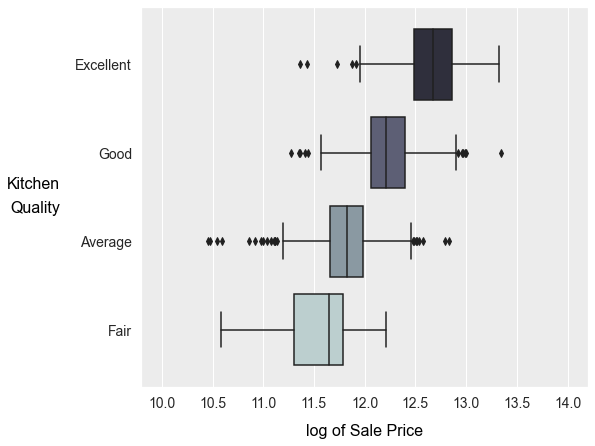

In [126]:
# Figure 5
# KitchenQual

fig = plt.figure(figsize = (5,5))
ax = plt.axes() 
   
# Ordering by median
temp = train.groupby(['KitchenQual'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels0 = ['Fair', 'Average', 'Good','Excellent']


g = sns.boxplot(ax=ax, 
    y=train['KitchenQual'], 
    x=train['log_SalePrice'],
    order = list(temp['KitchenQual']), palette="bone_r")      #Blues
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
ax.set_xlim(9.8,14.20)

ax.text(9.0,1.65,'Kitchen',ha = 'right', va='center',
         fontsize=16,color='black',
         rotation=0)
ax.text(9.0,1.38,'Quality',ha = 'right', va='center',
         fontsize=16,color='black',
         rotation=0)

ax.set_ylim(-0.65,3.65)
ax.set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)
#ax.set_xticklabels([])

##################################
    
ax.set_xlim(9.8,14.20)
ax.text(12,-1.20,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)
ax.tick_params(axis='x',labelsize=14)
ax.set_facecolor('#ECECEC')

fig.set_figheight(7)
fig.set_figwidth(8)


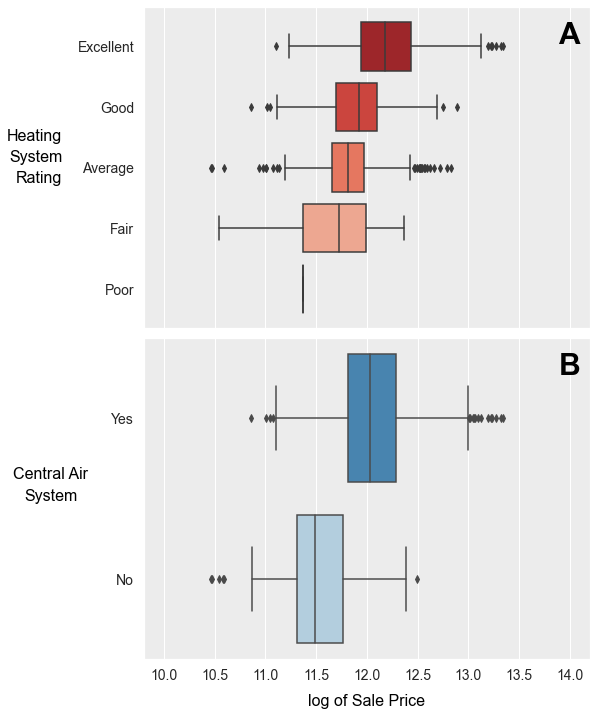

In [127]:
# Figure 6
fig, axes = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1],
                                            'height_ratios': [1, 1]})    
# Ordering by median
temp = train.groupby(['CentralAir'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels0 = ['No', 'Yes']


g = sns.boxplot(ax=axes[1], 
    y=train['CentralAir'], 
    x=train['log_SalePrice'],
    order = list(temp['CentralAir']), palette="Blues")      #Blues
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
axes[1].set_xlim(9.8,14.20)

axes[1].text(9.25,0.65,'Central Air',ha = 'right', va='center',
         fontsize=16,color='black',
         rotation=0)
axes[1].text(9.15,0.515,'System',ha = 'right', va='center',
         fontsize=16,color='black',
         rotation=0)

axes[1].set_ylim(-0.5,1.5)
axes[1].set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)
#axes[1].set_xticklabels([])
axes[1].text(14,1.27,'B',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)  
axes[1].set_facecolor('#ECECEC')
axes[1].tick_params(axis='x',labelsize=14)
axes[1].text(12,-0.79,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)
##################################
    
# Ordering by median
temp = train.groupby(['HeatingQC'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels1 = ['Poor','Fair', 'Average', 'Good','Excellent']

g = sns.boxplot(ax=axes[0],
    y=train['HeatingQC'], 
    x=train['log_SalePrice'],
    order = list(temp['HeatingQC']), palette="Reds")      #OrRd
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 12)
axes[0].set_xlim(9.8,14.20)

axes[0].set_ylim(-0.65,4.65)
axes[0].set_yticklabels(y_ticks_labels1, rotation=0, fontsize=14)
axes[0].text(12,-1.42,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)

axes[0].text(9.0,2.45,'Heating',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[0].text(9.0,2.10,'System',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[0].text(9.0,1.75,'Rating',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[0].tick_params(axis='x',labelsize=14)
axes[0].text(14,4.05,'A',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)  
axes[0].set_facecolor('#ECECEC')

fig.set_figheight(12)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.03)

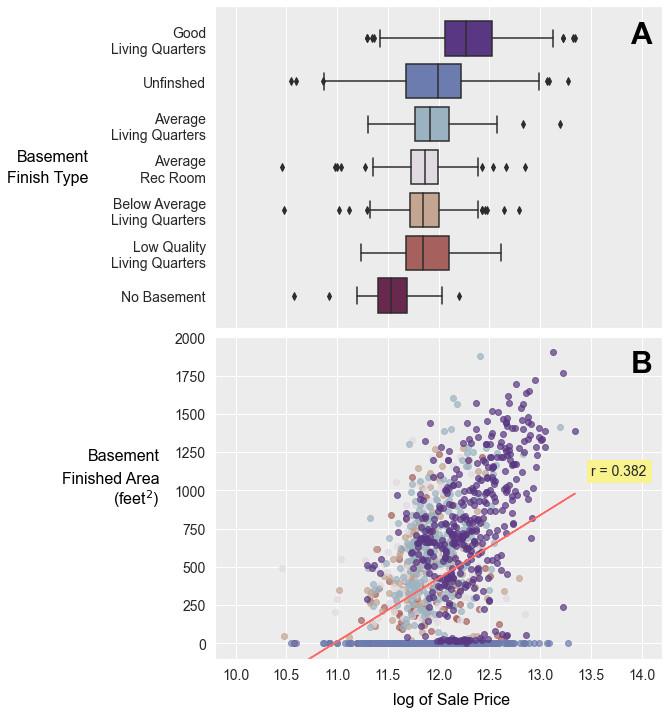

In [128]:
# Figure 7
fig, axes = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1],
                                            'height_ratios': [1, 1]})    
# Ordering by median
temp = train.groupby(['BsmtFinType1'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels0 = ['No Basement', 
                   'Low Quality\nLiving Quarters', 
                   'Below Average\nLiving Quarters', 
                   'Average\nRec Room', 
                   'Average\nLiving Quarters', 
                   'Unfinshed', 
                   'Good\nLiving Quarters']

g = sns.boxplot(ax=axes[0], 
    y=train['BsmtFinType1'], 
    x=train['log_SalePrice'],
    order = list(temp['BsmtFinType1']), palette="twilight_shifted_r")      #terrain_r, gist_earth_r
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
axes[0].set_xlim(9.8,14.20)

axes[0].text(8.55,3.25,'Basement',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)
axes[0].text(8.55,2.75,'Finish Type',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)

axes[0].set_ylim(-0.75,6.75)

axes[0].set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)
axes[0].set_xticklabels([])
axes[0].text(14,5.90,'A',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0) 
axes[0].set_facecolor('#ECECEC')

##################################
    
#BsmtFinSF1 
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'NoBsmt'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'NoBsmt'),'BsmtFinSF1'],
                color='#69284d',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'LwQ'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'LwQ'),'BsmtFinSF1'],
                color='#a6615e',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'BLQ'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'BLQ'),'BsmtFinSF1'],
                color='#c4a591',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'Rec'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'Rec'),'BsmtFinSF1'],
                color='#e1dae1',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'ALQ'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'ALQ'),'BsmtFinSF1'],
                color='#9bb3c0',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'Unf'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'Unf'),'BsmtFinSF1'],
                color='#6d7caf',alpha=0.70)
axes[1].scatter(train.loc[(train['BsmtFinType1'] == 'GLQ'),'log_SalePrice'],
                train.loc[(train['BsmtFinType1'] == 'GLQ'),'BsmtFinSF1'],
                color='#5a3783',alpha=0.70)

x = train['log_SalePrice']
y = train['BsmtFinSF1']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axes[1].plot(x, m*x + c, '#FF6865')
rr = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
axes[1].text(13.78,1128,('r = '+ str(round(rr[0,1],3))), fontsize=14, 
              ha='center',va='center',
              backgroundcolor='#f8f38e')

g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 12)
axes[1].set_xlim(9.8,14.20)

axes[1].set_ylim(-100,2000)
axes[1].text(12.125,-395,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)

axes[1].text(9.25,1200,'Basement',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[1].text(9.25,1050,'Finished Area',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[1].text(9.25,910,'(feet$^2$)',ha = 'right', 
         fontsize=16,color='black',
         rotation=0)
axes[1].tick_params(axis='both',labelsize=14)
axes[1].text(14,1775,'B',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)  
axes[1].set_facecolor('#ECECEC')

fig.set_figheight(12)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.03)

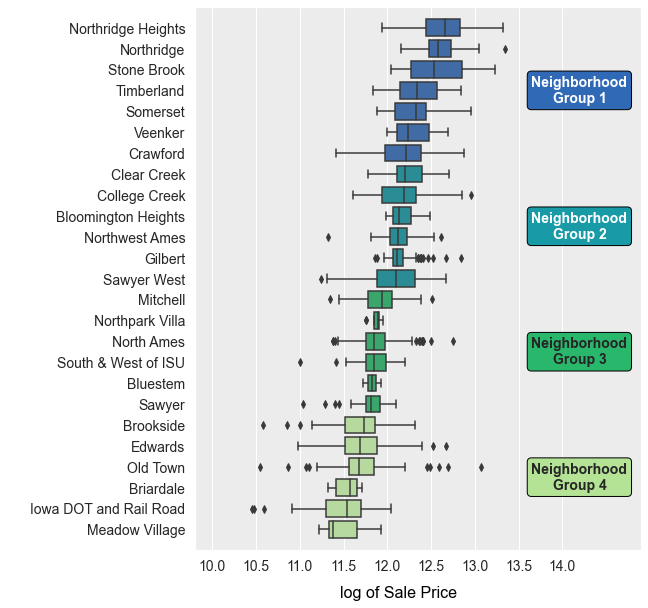

In [129]:
# Figure 8 
fig = plt.figure(figsize = (11,8))
axes = plt.axes() 

grpcolor1 = "#3069b5"
grpcolor2 = "#189ba7"
grpcolor3 = "#29b86b"
grpcolor4 = "#b4e396"

# Ordering by median
temp = train.groupby(['Neighborhood'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   

y_ticks_labels0 = ['Meadow Village',
 'Iowa DOT and Rail Road',
 'Briardale',
 'Old Town',
 'Edwards',
 'Brookside',
 'Sawyer',
 'Bluestem',
 'South & West of ISU',
 'North Ames',
 'Northpark Villa',
 'Mitchell',
 'Sawyer West',
 'Gilbert',
 'Northwest Ames',
 'Bloomington Heights',
 'College Creek',
 'Clear Creek',
 'Crawford',
 'Veenker',
 'Somerset',
 'Timberland',
 'Stone Brook',
 'Northridge',
 'Northridge Heights']

palette0 = {'MeadowV':grpcolor4,
 'IDOTRR':grpcolor4,
 'BrDale':grpcolor4,
 'OldTown':grpcolor4,
 'Edwards':grpcolor4,
 'BrkSide':grpcolor4,
 'Sawyer':grpcolor3, # grp3
 'Blueste':grpcolor3,
 'SWISU':grpcolor3,
 'NAmes':grpcolor3,
 'NPkVill':grpcolor3,
 'Mitchel':grpcolor3,
 'SawyerW':grpcolor2,# grp 2
 'Gilbert':grpcolor2,
 'NWAmes':grpcolor2,
 'Blmngtn':grpcolor2,
 'CollgCr':grpcolor2,
 'ClearCr':grpcolor2,
 'Crawfor':grpcolor1, # grp 1
 'Veenker':grpcolor1, # grp 1
 'Somerst':grpcolor1, # grp 1
 'Timber':grpcolor1,  # grp 1
 'StoneBr':grpcolor1, # grp 1
 'NoRidge':grpcolor1, # grp 1
 'NridgHt':grpcolor1} # grp 1

g = sns.boxplot(ax=axes, 
    y=train['Neighborhood'], 
    x=train['log_SalePrice'],
    order = list(temp['Neighborhood']), palette=palette0)      # YlGn, terrain_r, PuOr, RdYlBu
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
axes.set_xlim(9.8,14.90) #9.8,14.20
axes.set_xticks([10,10.5,11,11.5,12,12.5,13,13.5,14])

#axes.text(9.91,25.0,'Neighborhoods',ha = 'right', 
#         fontsize=16,color='black',weight='bold',
#         rotation=0)

axes.set_ylim(-1,25)
axes.set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)
axes.text(12.125,-3.27,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)

axes.text(14.195,21,'Neighborhood\nGroup 1',ha = 'center',va='center',
         fontsize=14,rotation=0,color='white',weight='bold',
         bbox=dict(facecolor=grpcolor1, edgecolor='black', boxstyle='round'))
axes.text(14.195,14.5,'Neighborhood\nGroup 2',ha = 'center',va='center', 
         fontsize=14,rotation=0,color='white',weight='bold',
         bbox=dict(facecolor=grpcolor2, edgecolor='black', boxstyle='round'))
axes.text(14.195,8.5,'Neighborhood\nGroup 3',ha = 'center',va='center',
         fontsize=14,rotation=0,weight='bold',
         bbox=dict(facecolor=grpcolor3, edgecolor='black', boxstyle='round'))
axes.text(14.195,2.5,'Neighborhood\nGroup 4',ha = 'center',va='center',
          fontsize=14, rotation=0,weight='bold',
          bbox=dict(facecolor=grpcolor4, edgecolor='black', boxstyle='round'))
axes.tick_params(axis='x',labelsize=14)
axes.set_facecolor('#ECECEC')

fig.set_figheight(10)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.03)

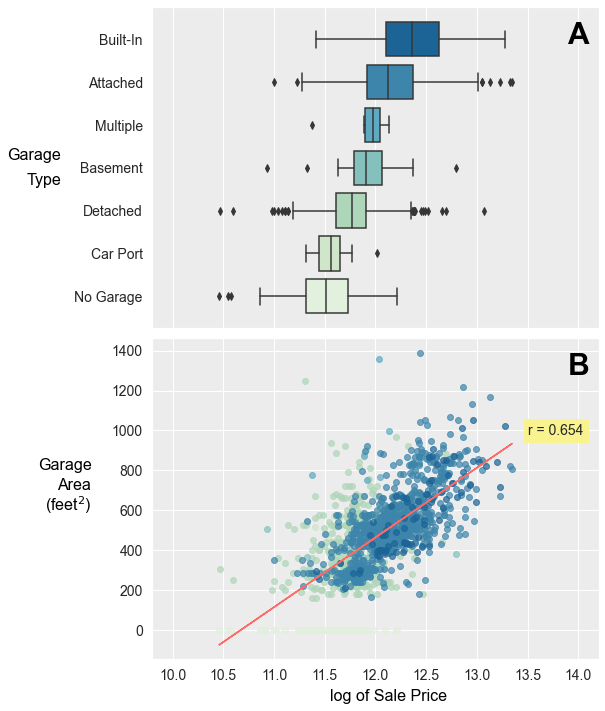

In [130]:
# Not Used
fig, axes = plt.subplots(2, 1, gridspec_kw={'width_ratios': [1],
                                            'height_ratios': [1, 1]})    
# Ordering by median
temp = train.groupby(['GarageType'])['log_SalePrice'].median().sort_values(ascending=True).reset_index()   
y_ticks_labels0 = ['No Garage', 'Car Port', 'Detached', 'Basement', 'Multiple', 'Attached','Built-In']

g = sns.boxplot(ax=axes[0], 
    y=train['GarageType'], 
    x=train['log_SalePrice'],
    order = list(temp['GarageType']), palette="GnBu")    
g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 20)
axes[0].set_xlim(9.8,14.20)

axes[0].text(8.9,3.30,'Garage',ha = 'right',va='center', 
         fontsize=16,color='black',
         rotation=0)
axes[0].text(8.9,2.70,'Type',ha = 'right',va='center',  
         fontsize=16,color='black',
         rotation=0)

axes[0].set_ylim(-0.75,6.75)
axes[0].set_yticklabels(y_ticks_labels0, rotation=0, fontsize=14)
axes[0].set_xticklabels([])
axes[0].text(14,5.90,'A',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)  
axes[0].set_facecolor('#ECECEC')
##################################
    
#GarageArea
axes[1].scatter(train.loc[(train['GarageType'] == 'None'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'None'),'GarageArea'],
                color='#e2f0de',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == 'CarPort'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'CarPort'),'GarageArea'],
                color='#cfe6ca',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == 'Detchd'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'Detchd'),'GarageArea'],
                color='#aed6b8',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == 'Basment'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'Basment'),'GarageArea'],
                color='#84c1bc',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == '2Types'),'log_SalePrice'],
                train.loc[(train['GarageType'] == '2Types'),'GarageArea'],
                color='#5eaac2',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == 'Attchd'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'Attchd'),'GarageArea'],
                color='#3d85ab',alpha=0.70)
axes[1].scatter(train.loc[(train['GarageType'] == 'BuiltIn'),'log_SalePrice'],
                train.loc[(train['GarageType'] == 'BuiltIn'),'GarageArea'],
                color='#1c6496',alpha=0.70)

x = train['log_SalePrice']
y = train['GarageArea']
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
axes[1].plot(x, m*x + c, '#FF6865')
rr = ma.corrcoef(ma.masked_invalid(x), 
                ma.masked_invalid(y))
axes[1].text(13.78,1000,('r = '+ str(round(rr[0,1],3))), fontsize=14, 
              ha='center',va='center',
              backgroundcolor='#f8f38e')

g.set_ylabel(" ", fontsize = 20)
g.set_xlabel(" ", fontsize = 12)
axes[1].set_xlim(9.8,14.20)

#axes[1].set_ylim(-0.75,4.75)
axes[1].text(12.125,-355,'log of Sale Price',ha = 'center',
         fontsize=16,color='black',
         rotation=0)

axes[1].text(9.2,825,'Garage',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)
axes[1].text(9.2,725,'Area',ha = 'right',va='center',
         fontsize=16,color='black',
         rotation=0)
axes[1].text(9.2,625,'(feet$^2$)',ha = 'right',va='center', 
         fontsize=16,color='black',
         rotation=0)
axes[1].tick_params(axis='both',labelsize=14)
axes[1].text(14,1280,'B',ha = 'center',
         fontsize=30,color='black', weight='bold',
         rotation=0)  

fig.set_figheight(12)
fig.set_figwidth(8)
fig.subplots_adjust(hspace=0.03)
axes[1].set_facecolor('#ECECEC') 

In [131]:
np.median(train['Num_Bathrms_AbvGrd'])

2.0

In [132]:
np.std(train['Num_Bathrms_AbvGrd'])

0.6270057993162359

In [133]:
np.median(train['GrLivArea'])

1459.0

In [134]:
np.std(train['GrLivArea'])

497.18905547998907

In [135]:
np.std(train['AgeHome'])

30.331365071881173

In [136]:
np.std(train['BsmtFinSF1'])

427.9648261367814

# Running some STATS

In [142]:
# Running between-groups ANOVAs & calculating Effect Sizes
import statsmodels.api as sm
from statsmodels.formula.api import ols
c_pvalues = []
c_eff_sizes = []

catlist = ['Exterior1st','ExterQual',
           'Neighborhood', 'Neighborhood_Grp','KitchenQual', 
           'HeatingQC','CentralAir','GarageType',
           'GarageArea','BsmtFinType1']

for cvar in catlist:   
    # Running a between groups ANOVA
    mstr = 'log_SalePrice ~ ' + cvar
    mod = ols(mstr,data=train).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    
    eff_size_temp = (aov_table['sum_sq'][0])/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
    
    c_pvalues.append(aov_table['PR(>F)'][0])
    c_eff_sizes.append(eff_size_temp)
    
# Combine the p-values and effect sizes:
zipped = list(zip(catlist,
                 c_pvalues, 
                 c_eff_sizes))

cat_results = pd.DataFrame(zipped, columns=['cat var',
                                       'anova_pvalues',
                                       'effect_sizes'])

print('Only presenting the variables that have ')
print('Anova p-values < 0.01 and effect sizes > 0.059')

pd.options.display.float_format = '{:,.5f}'.format

cat_results_sorted = cat_results.sort_values('anova_pvalues', ascending = True)
cat_results_sorted.head(50)
cat_temp = cat_results_sorted.loc[(cat_results_sorted['anova_pvalues']<0.01) &
                      cat_results_sorted['effect_sizes'] > 0.059]
cat_temp.sort_values('effect_sizes', ascending = False)

               sum_sq          df        F  PR(>F)
Exterior1st  42.97826    14.00000 23.90155 0.00000
Residual    183.15312 1,426.00000      NaN     NaN
             sum_sq          df         F  PR(>F)
ExterQual 104.52450     3.00000 411.71383 0.00000
Residual  121.60688 1,437.00000       NaN     NaN
                sum_sq          df        F  PR(>F)
Neighborhood 128.78875    24.00000 78.05969 0.00000
Residual      97.34264 1,416.00000      NaN     NaN
                    sum_sq          df         F  PR(>F)
Neighborhood_Grp 115.64562     3.00000 501.37004 0.00000
Residual         110.48577 1,437.00000       NaN     NaN
               sum_sq          df         F  PR(>F)
KitchenQual 100.71129     3.00000 384.63298 0.00000
Residual    125.42010 1,437.00000       NaN     NaN
             sum_sq          df         F  PR(>F)
HeatingQC  53.34453     4.00000 110.83417 0.00000
Residual  172.78685 1,436.00000       NaN     NaN
              sum_sq          df         F  PR(>F)
CentralAir  2

,cat var,anova_pvalues,effect_sizes
2,Neighborhood,0.00000,0.56953
3,Neighborhood_Grp,0.00000,0.51141
1,ExterQual,0.00000,0.46223
4,KitchenQual,0.00000,0.44537
8,GarageArea,0.00000,0.42718
7,GarageType,0.00000,0.33966
5,HeatingQC,0.00000,0.23590
9,BsmtFinType1,0.00000,0.22665
0,Exterior1st,0.00000,0.19006
6,CentralAir,0.00000,0.12594


In [139]:
# Post hoc Tests for ExterQual
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=train, res_var='log_SalePrice', xfac_var='ExterQual', anova_model='log_SalePrice ~ ExterQual')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Gd,TA,0.46871,0.42642,0.51099,40.31896,0.00100
1,Gd,Ex,0.47075,0.35855,0.58295,15.26122,0.00100
2,Gd,Fa,1.00198,0.79912,1.20484,17.96616,0.00100
3,TA,Ex,0.93946,0.82969,1.04923,31.13082,0.00100
4,TA,Fa,0.53327,0.33174,0.73479,9.62524,0.00100
5,Ex,Fa,1.47273,1.24598,1.69947,23.62536,0.00100


In [140]:
# Post hoc Tests for KitchenQual
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=train, res_var='log_SalePrice', xfac_var='KitchenQual', anova_model='log_SalePrice ~ KitchenQual')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Gd,TA,0.41014,0.36783,0.45244,35.26395,0.00100
1,Gd,Ex,0.40724,0.32313,0.49134,17.61289,0.00100
2,Gd,Fa,0.71589,0.59019,0.84159,20.71608,0.00100
3,TA,Ex,0.81737,0.73447,0.90027,35.86517,0.00100
4,TA,Fa,0.30575,0.18086,0.43065,8.90468,0.00100
5,Ex,Fa,1.12313,0.97862,1.26764,28.27031,0.00100


In [143]:
# Post hoc Tests for Neighborhood_Grp
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=train, res_var='log_SalePrice', xfac_var='Neighborhood_Grp', anova_model='log_SalePrice ~ Neighborhood_Grp')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,good,affluent,0.27902,0.22573,0.33231,19.04477,0.00100
1,good,average,0.28632,0.23530,0.33735,20.41020,0.00100
2,good,affordable,0.49811,0.44539,0.55082,34.36909,0.00100
3,affluent,average,0.56535,0.51137,0.61932,38.09953,0.00100
4,affluent,affordable,0.77713,0.72156,0.83271,50.86425,0.00100
5,average,affordable,0.21179,0.15838,0.26519,14.42418,0.00100
